# Ad-hoc Model Training
For training throw-away or experimental models

In [1]:
# Change directory to keep paths consistent
%cd /Users/brk/projects/masters/SU/ergo/src

/Users/brk/projects/masters/SU/ergo/src


In [2]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import ipywidgets as widgets
import datetime
from ipywidgets import interact, interactive, fixed, interact_manual
import pandas as pd
import numpy as np
import models
import vis
import common
import read
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
import sklearn
import tqdm
import logging as l
import tqdm
import yaml
import glob
from matplotlib.colors import LogNorm
import re
from sklearn.metrics import classification_report
const = common.read_constants('../src/constants.yaml')

def heatmap(fn, X_val, y_val, axis=1):
    y_val_pred = np.argmax(tf.nn.softmax(fn(X_val)).numpy(), axis=axis)

    cm_val = tf.math.confusion_matrix(
        y_val.flatten(), 
        y_val_pred.flatten()
    ).numpy()
    cm_val[-1, -1] = 0
    return sns.heatmap(cm_val, annot=False, fmt='d', square=True, mask=(cm_val==0), cmap='viridis')

In [3]:
(
    X_trn, X_val, y_trn, y_val, dt_trn, dt_val
) = common.read_and_split_from_npz("../gesture_data/trn_20_10.npz")

In [92]:
y_true = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
y_pred = np.array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])
leeway = 1
default = 0
# 1 -> correct prediction correct time
# 2 -> correct prediction, too early
# 3 -> correct prediction, too late
# 4 -> No prediction

# def massage(y_true, y_pred):
#     print(np.nonzero(y_pred == 1)[0])
#     return y_pred
# print(sklearn.metrics.classification_report(
#     y_true,
#     massage(y_true, y_pred)
# ))

idxs_true = np.nonzero(y_true == 1)[0]
idxs_pred = np.nonzero(y_pred == 1)[0]

diffs = np.full((idxs_true.shape[0], idxs_pred.shape[0]), np.inf)
print(idxs_true)
print(idxs

SyntaxError: incomplete input (1811554557.py, line 23)

#### Investigate how far off predictions usually are

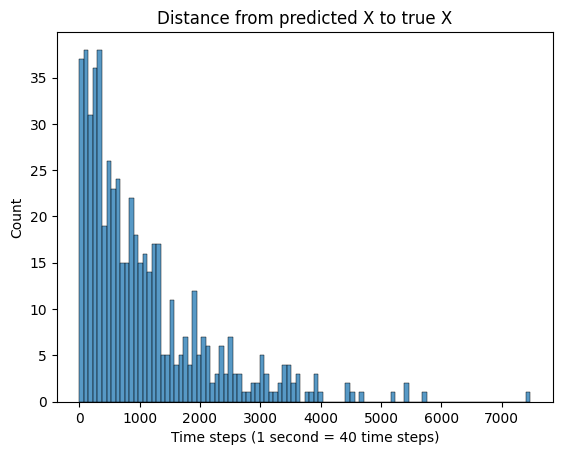

TypeError: title() missing 1 required positional argument: 'label'

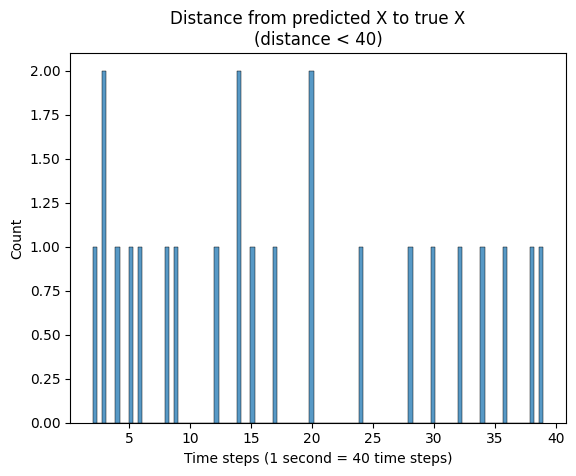

In [133]:
def get_npz_data_from_model(model_dir):
    """Given a directory of a model, return it's y_pred and y_true."""
    data = np.load(f'{model_dir}/y_val_true_y_val_pred.npz')
    y_true = data['y_true']
    y_pred = data['y_pred']
    return y_true, y_pred

y_true, y_pred = get_npz_data_from_model('../saved_models/ffnn_2023-08-31T19:49:13.740409/')
default = 50

min_diffs = np.array([])
gesture_classes = np.unique(y_true)
for gesture in gesture_classes:
    if gesture == default:
        continue
        
    idxs_true = np.nonzero(y_true == gesture)[0]
    idxs_pred = np.nonzero(y_pred == gesture)[0]
    diffs = idxs_true[:, np.newaxis] - idxs_pred
    min_diff = np.abs(diffs).min(axis=0)
    min_diff = min_diff[min_diff > 0]
    min_diffs = np.concatenate((min_diffs, min_diff))
    
sns.histplot(min_diffs, bins=100)
plt.title("Distance from predicted X to true X")
plt.xlabel("Time steps (1 second = 40 time steps)")
plt.show()
sns.histplot(min_diffs[min_diffs < 40], bins=100)
plt.title("Distance from predicted X to true X\n(distance < 40)")
plt.xlabel("Time steps (1 second = 40 time steps)")
plt.title()

In [67]:
np.bstack((y_true, y_pred))

AttributeError: module 'numpy' has no attribute 'bstack'

#  DTW

In [ ]:
(
    X_trn, X_val, y_trn, y_val, dt_trn, dt_val
) = common.read_and_split_from_npz("../gesture_data/trn_20_10.npz")

In [48]:
def dynamic_time_warping(ts1, ts2):
    n = len(ts1)
    m = len(ts2)

    # Create a distance matrix and initialize it with large values
    dist_matrix = np.full((n, m), np.inf)
    dist_matrix[0, 0] = 0

    # Fill in the first row and column of the distance matrix
    for i in range(1, n):
        dist_matrix[i, 0] = dist_matrix[i - 1, 0] + distance(ts1[i], ts2[0])
    for j in range(1, m):
        dist_matrix[0, j] = dist_matrix[0, j - 1] + distance(ts1[0], ts2[j])

    # Fill in the rest of the distance matrix
    for i in range(1, n):
        for j in range(1, m):
            cost = distance(ts1[i], ts2[j])
            dist_matrix[i, j] = cost + min(dist_matrix[i - 1, j],      # Insertion
                                           dist_matrix[i, j - 1],      # Deletion
                                           dist_matrix[i - 1, j - 1])  # Match

    return dist_matrix[-1, -1]

def distance(x, y):
    # You can use any distance metric appropriate for your data
    return abs(x - y)

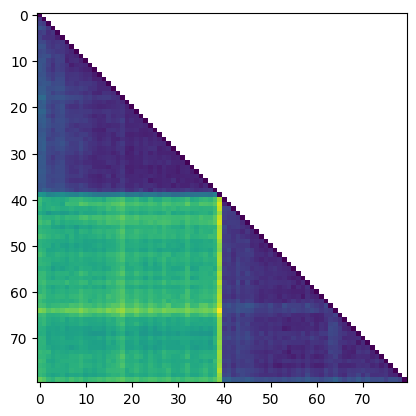

In [61]:
# Get two time series to compare and plot them
eq_g0 = np.nonzero(y_trn == 0)[0]
eq_g15 = np.nonzero(y_trn == 15)[0]

# arrs = [x1, x2, z1, z2]
arrs = np.concatenate((X_trn[eq_g0[0]], X_trn[eq_g0[1]]))
# names = ['x1', 'x2', 'z1', 'z2']

dists = np.full((len(arrs), len(arrs)), np.nan)
for i, arr_i in enumerate(arrs):
    for j, arr_j in enumerate(arrs):
        if i < j:
            continue
        dists[i, j] = dynamic_time_warping(arr_i, arr_j)

plt.imshow(dists)
plt.show()

# Feed-forward Neural Networks

In [136]:
(
    X_trn, X_val, y_trn, y_val, dt_trn, dt_val
) = common.read_and_split_from_npz("../gesture_data/trn_20_10.npz")

## Train a custom FFNN

Checking fit of X, y
Checking model params: X.shape=(147295, 20, 30) y.shape=(147295,) X_val.shape=(36824, 20, 30) y_val.shape=(36824,)
Shapes after allowlist: X.shape=(147295, 20, 30) y.shape=(147295,) X_val.shape=(36824, 20, 30) y_val.shape=(36824,)
Unique classes after allowlist:
y: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50],
y_val: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]
Shapes after max_obs_per_class=None: X.shape=(147295, 20, 30) y.shape=(147295,) X_val.shape=(36824, 20, 30) y_val.shape=(36824,)
Shapes after n_timesteps=20: X.shape=(147295, 20, 30) y.shape=(147295,) X_val.shape=(36824, 20, 30) y_val.shape=(36824,)
Fitting normalizer


2023-09-04 11:17:14.906737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 11:17:14.940466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Compiling model
Fitting model
Epoch 1/40


2023-09-04 11:17:28.875551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


686/686 [==============================] - ETA: 0s - loss: 3.1521

2023-09-04 11:17:35.246699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


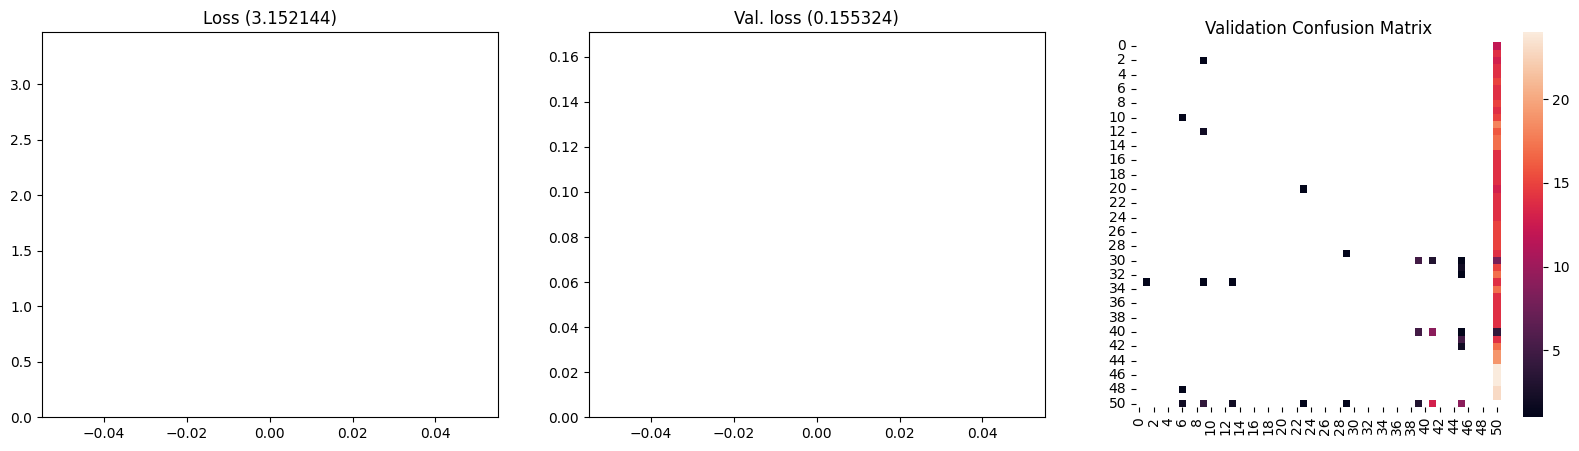

686/686 [==============================] - 9s 12ms/step - loss: 3.1521 - val_loss: 0.1553
Epoch 2/40
683/686 [============================>.] - ETA: 0s - loss: 1.0331

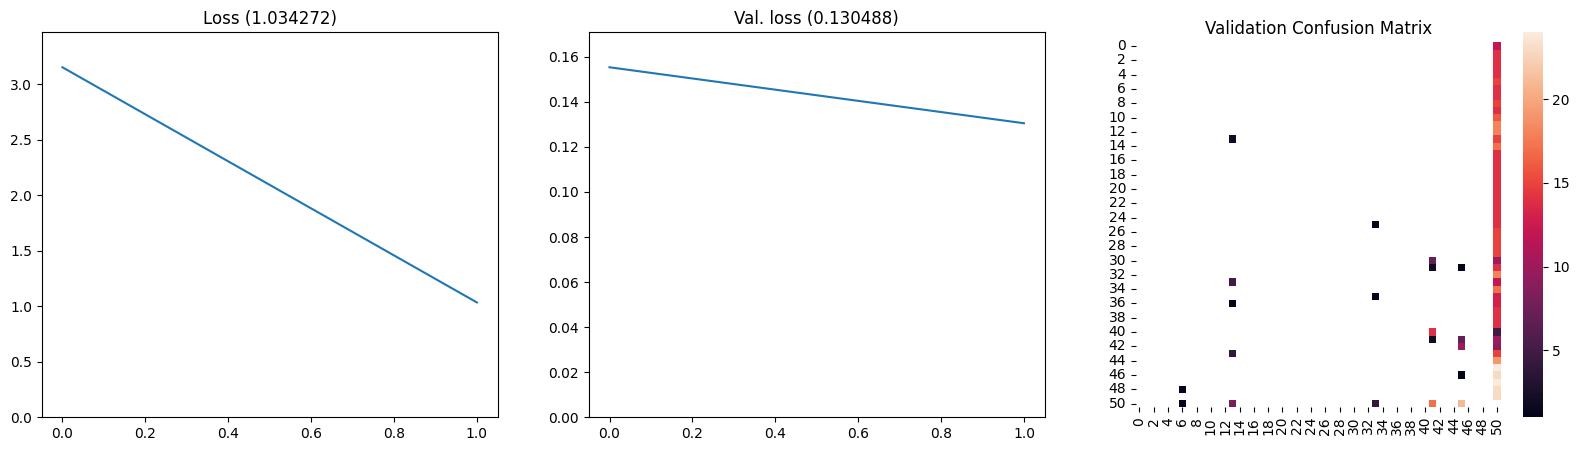

686/686 [==============================] - 7s 10ms/step - loss: 1.0343 - val_loss: 0.1305
Epoch 3/40
686/686 [==============================] - ETA: 0s - loss: 0.9025

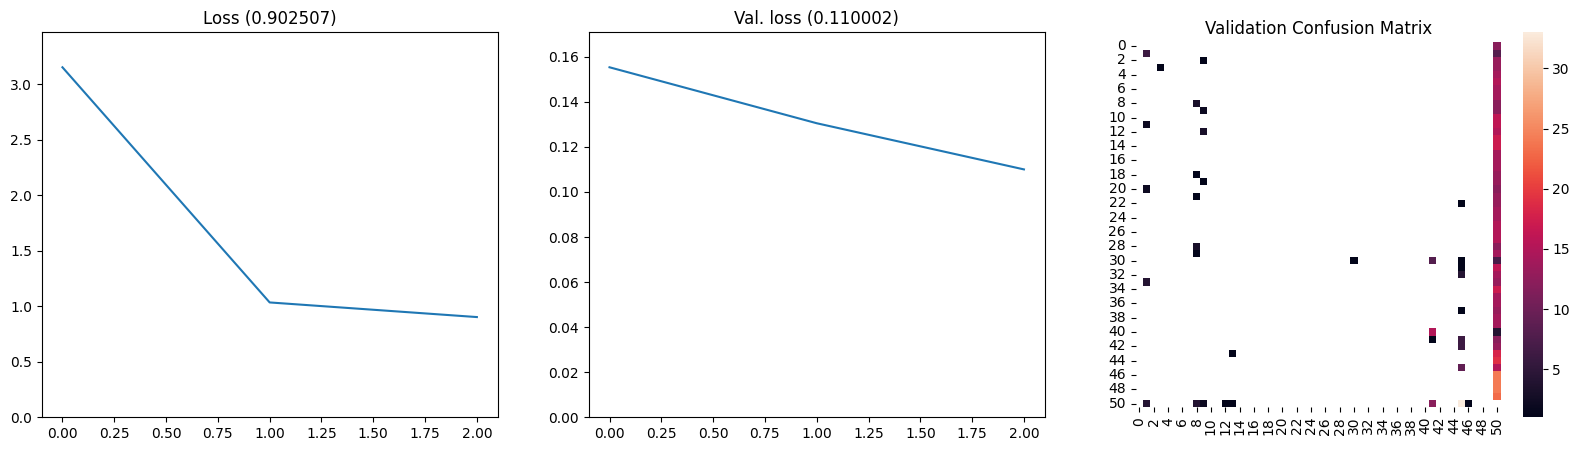

686/686 [==============================] - 7s 10ms/step - loss: 0.9025 - val_loss: 0.1100
Epoch 4/40
680/686 [============================>.] - ETA: 0s - loss: 0.7877

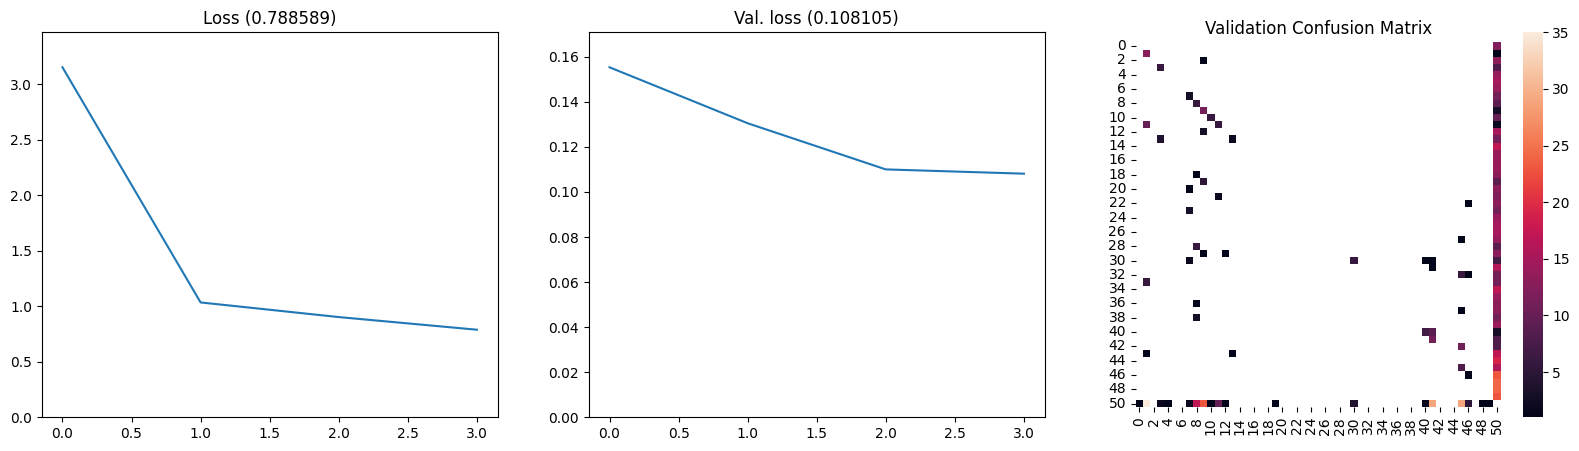

686/686 [==============================] - 7s 10ms/step - loss: 0.7886 - val_loss: 0.1081
Epoch 5/40
682/686 [============================>.] - ETA: 0s - loss: 0.7063

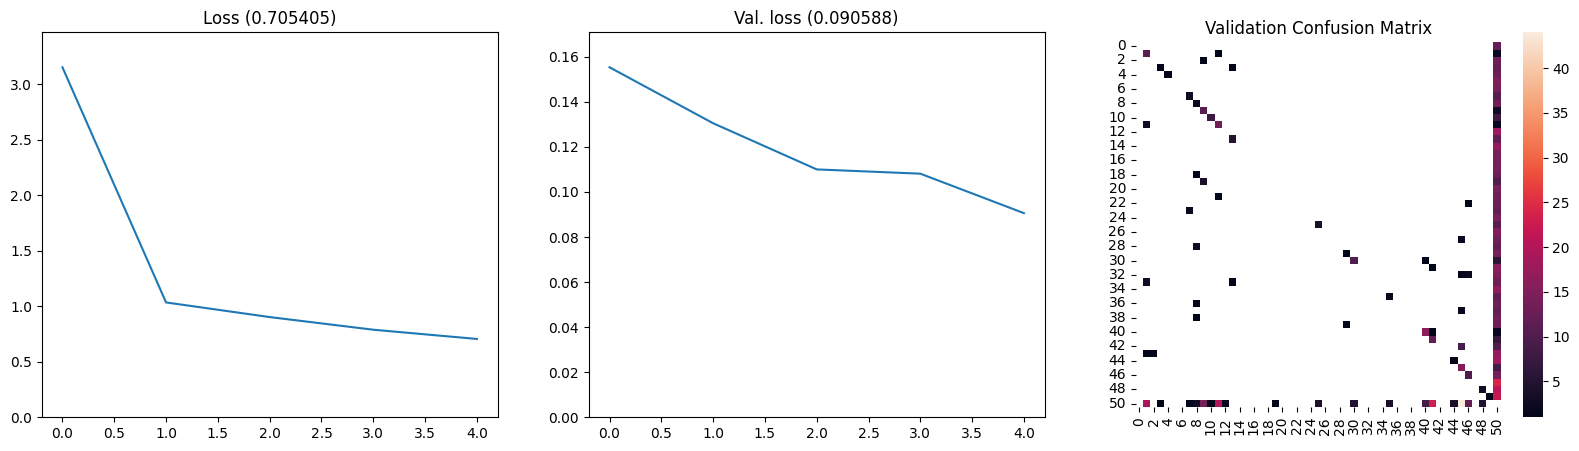

686/686 [==============================] - 7s 10ms/step - loss: 0.7054 - val_loss: 0.0906
Epoch 6/40
685/686 [============================>.] - ETA: 0s - loss: 0.6370

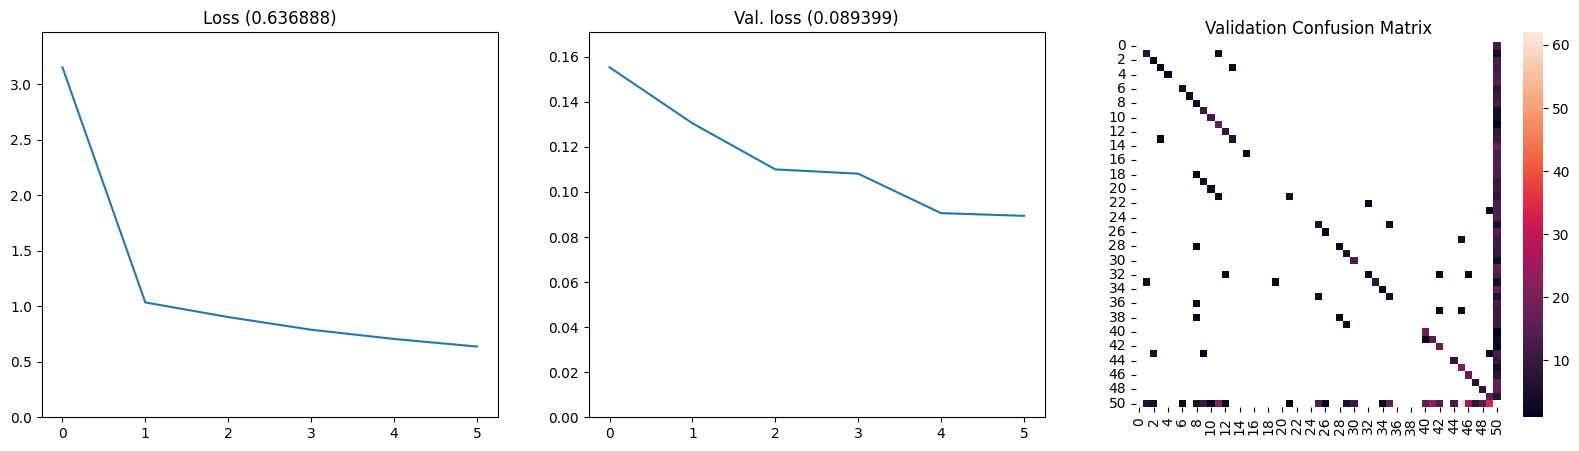

686/686 [==============================] - 7s 10ms/step - loss: 0.6369 - val_loss: 0.0894
Epoch 7/40
684/686 [============================>.] - ETA: 0s - loss: 0.5795

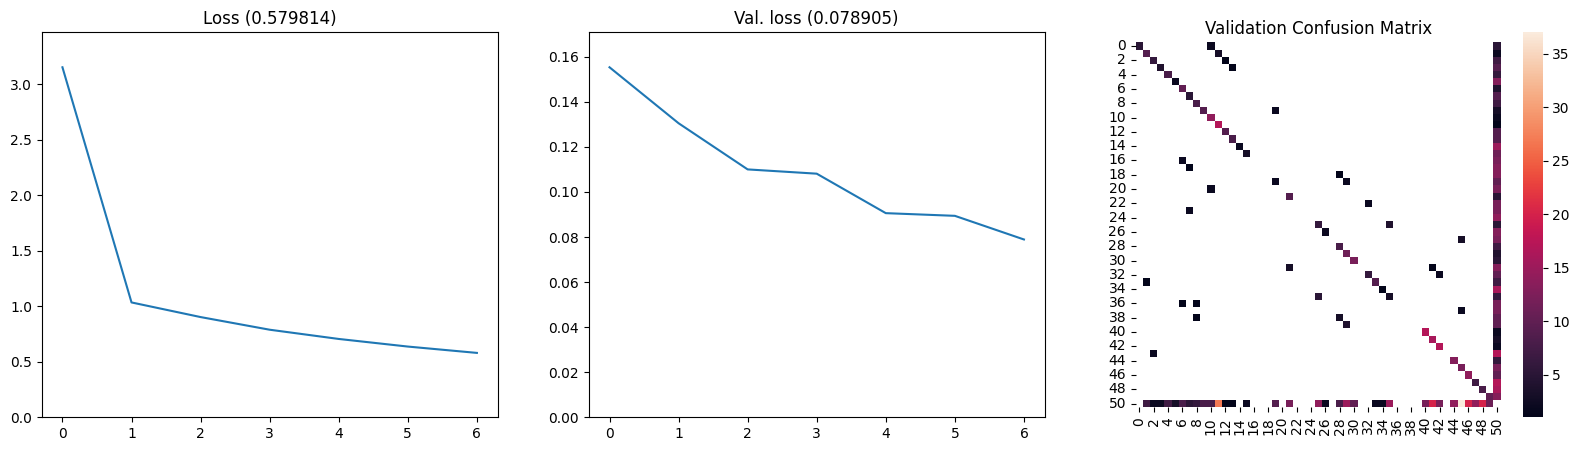

686/686 [==============================] - 6s 9ms/step - loss: 0.5798 - val_loss: 0.0789
Epoch 8/40
682/686 [============================>.] - ETA: 0s - loss: 0.5330

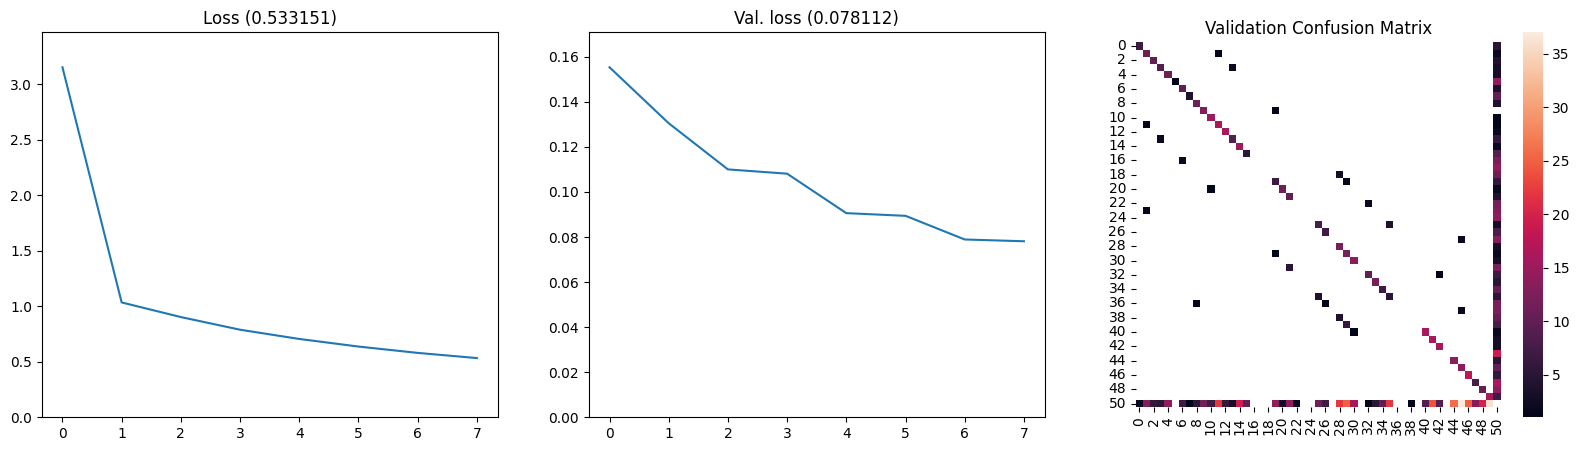

686/686 [==============================] - 7s 10ms/step - loss: 0.5332 - val_loss: 0.0781
Epoch 9/40
682/686 [============================>.] - ETA: 0s - loss: 0.5068

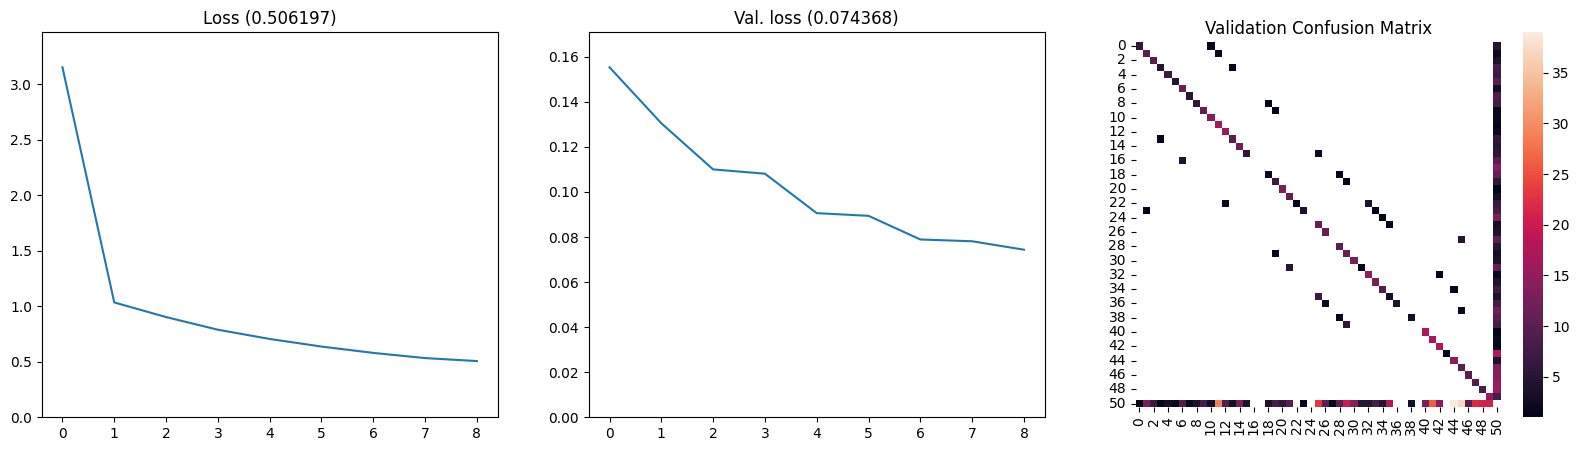

686/686 [==============================] - 7s 10ms/step - loss: 0.5062 - val_loss: 0.0744
Epoch 10/40
685/686 [============================>.] - ETA: 0s - loss: 0.4720

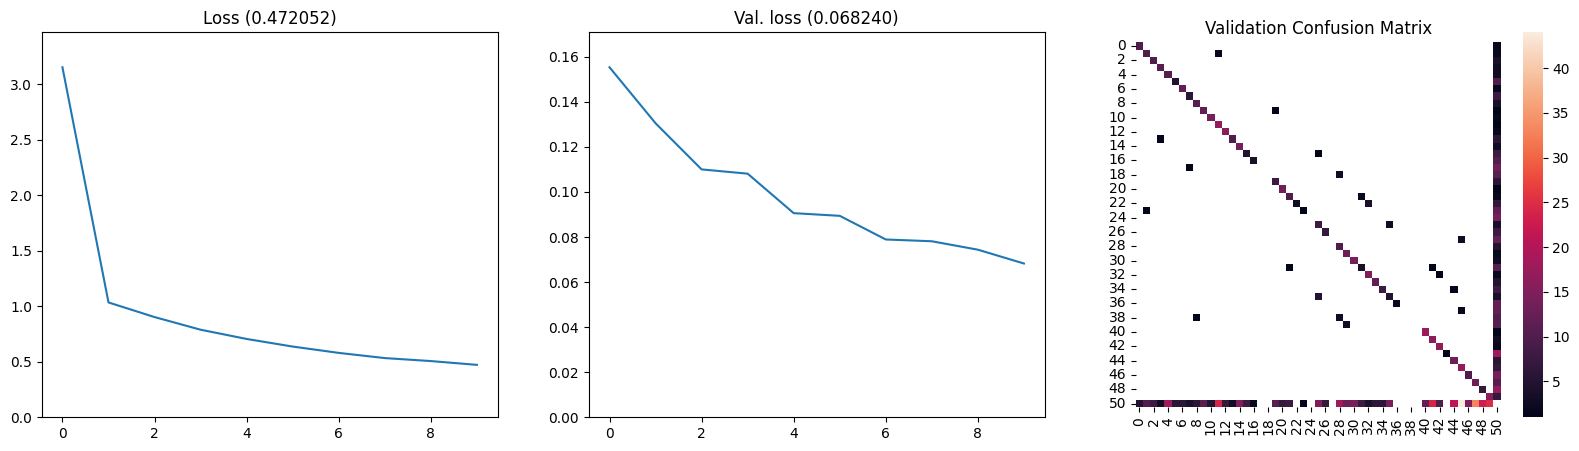

686/686 [==============================] - 6s 9ms/step - loss: 0.4721 - val_loss: 0.0682
Epoch 11/40
679/686 [============================>.] - ETA: 0s - loss: 0.4565

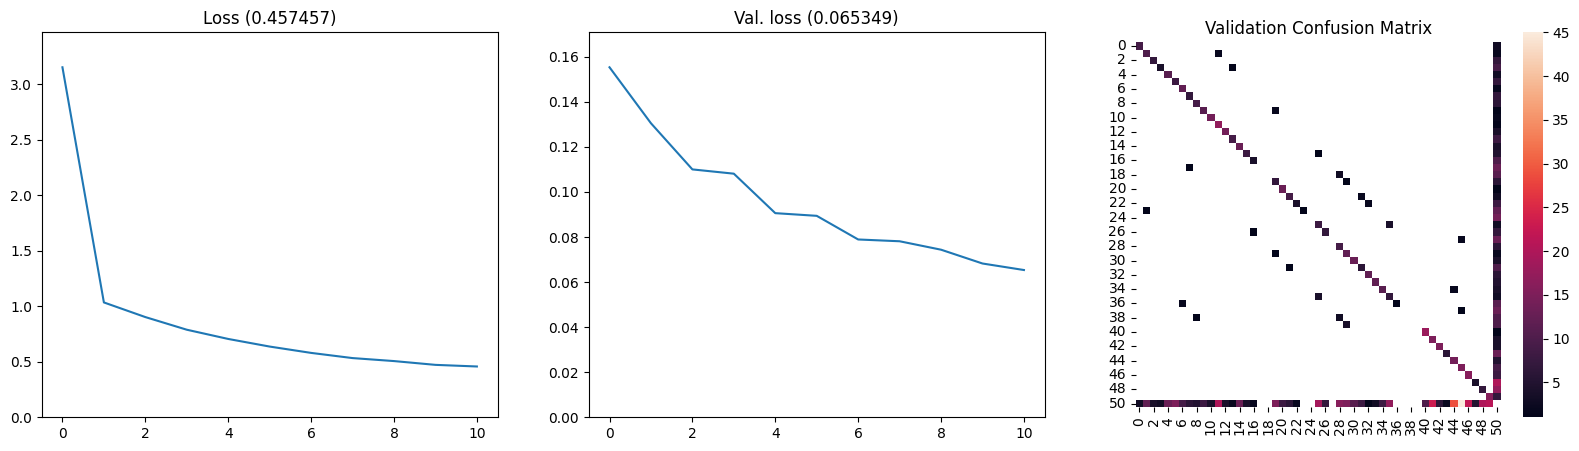

686/686 [==============================] - 6s 8ms/step - loss: 0.4575 - val_loss: 0.0653
Epoch 12/40
684/686 [============================>.] - ETA: 0s - loss: 0.4262

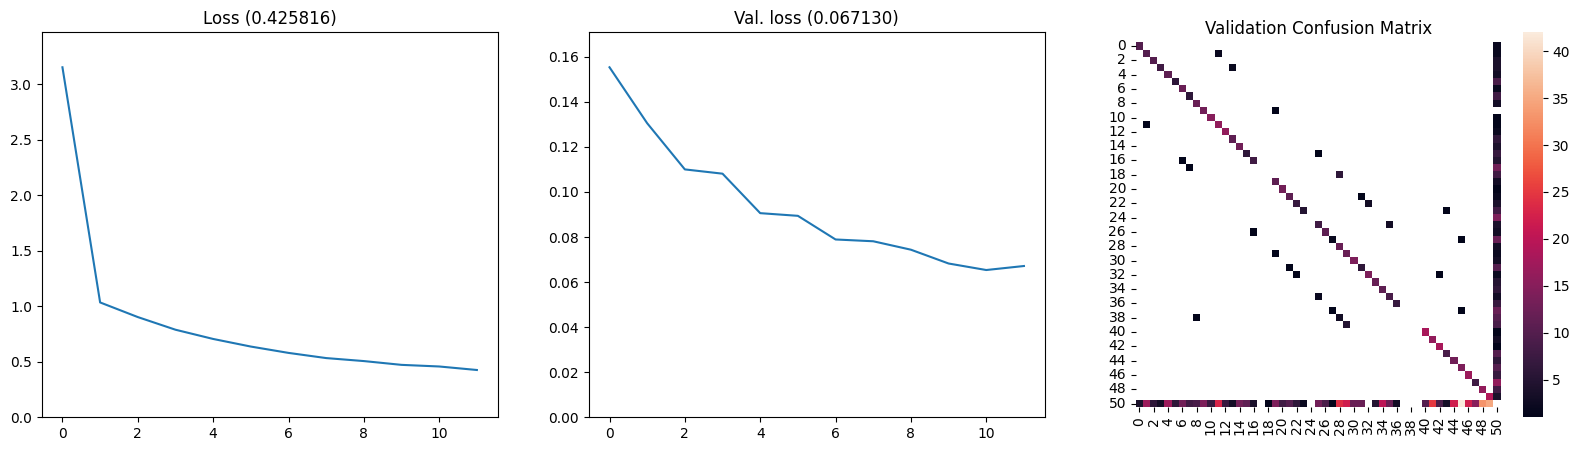

686/686 [==============================] - 8s 11ms/step - loss: 0.4258 - val_loss: 0.0671
Epoch 13/40
686/686 [==============================] - ETA: 0s - loss: 0.4201

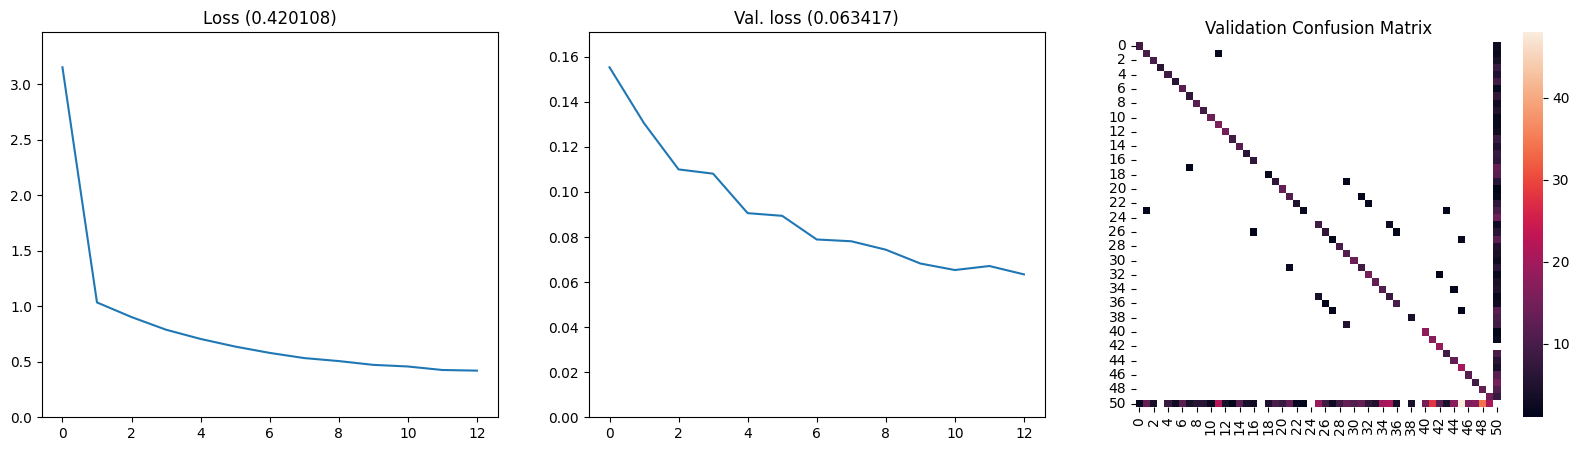

686/686 [==============================] - 7s 10ms/step - loss: 0.4201 - val_loss: 0.0634
Epoch 14/40
683/686 [============================>.] - ETA: 0s - loss: 0.4078

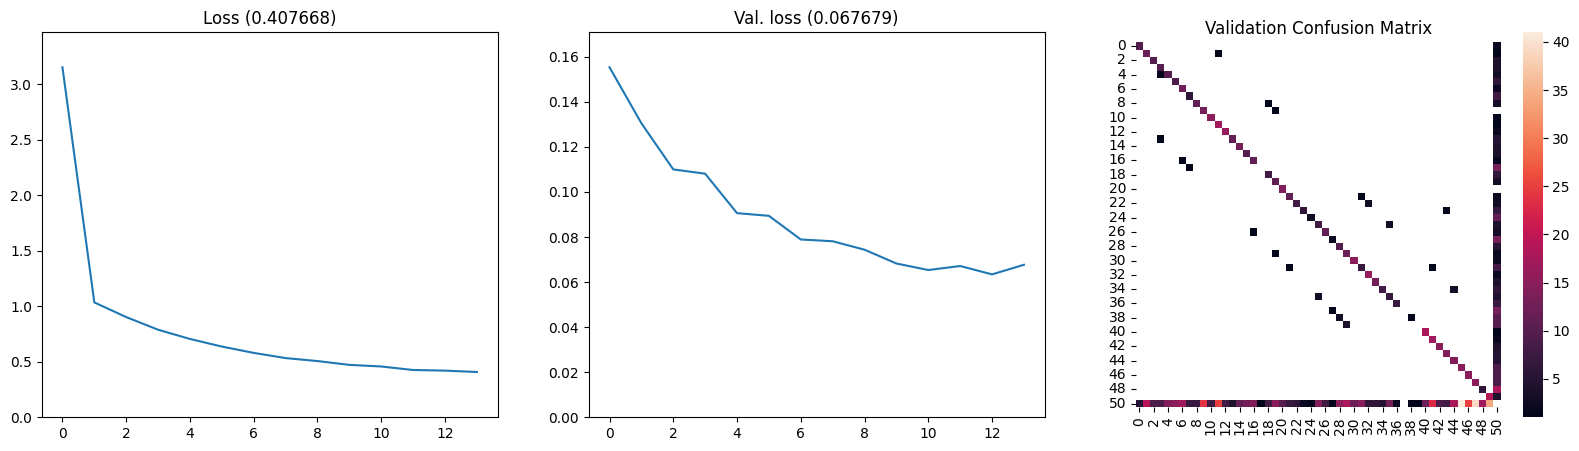

686/686 [==============================] - 7s 10ms/step - loss: 0.4077 - val_loss: 0.0677
Epoch 15/40
686/686 [==============================] - ETA: 0s - loss: 0.3916

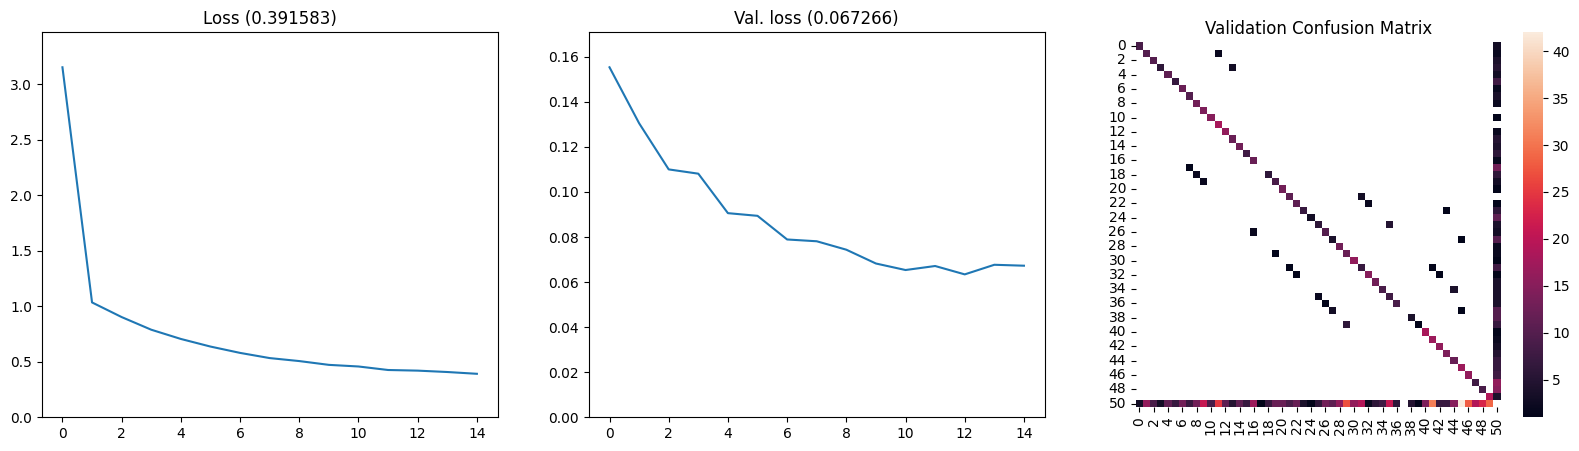

686/686 [==============================] - 8s 12ms/step - loss: 0.3916 - val_loss: 0.0673
Epoch 16/40
683/686 [============================>.] - ETA: 0s - loss: 0.3801

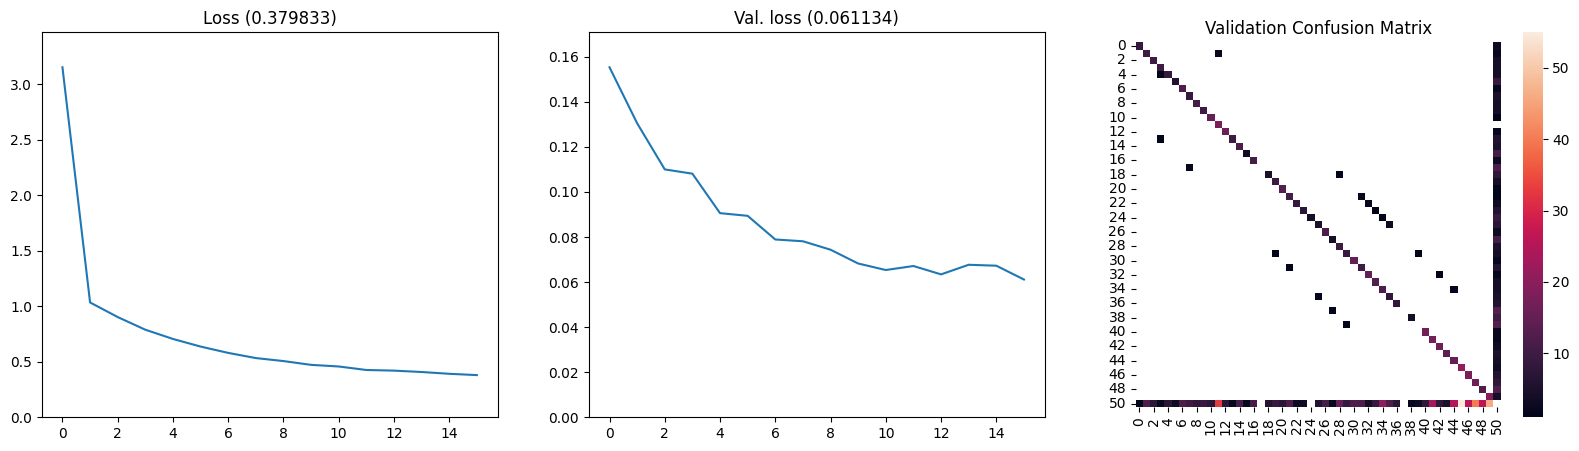

686/686 [==============================] - 8s 11ms/step - loss: 0.3798 - val_loss: 0.0611
Epoch 17/40
686/686 [==============================] - ETA: 0s - loss: 0.3757

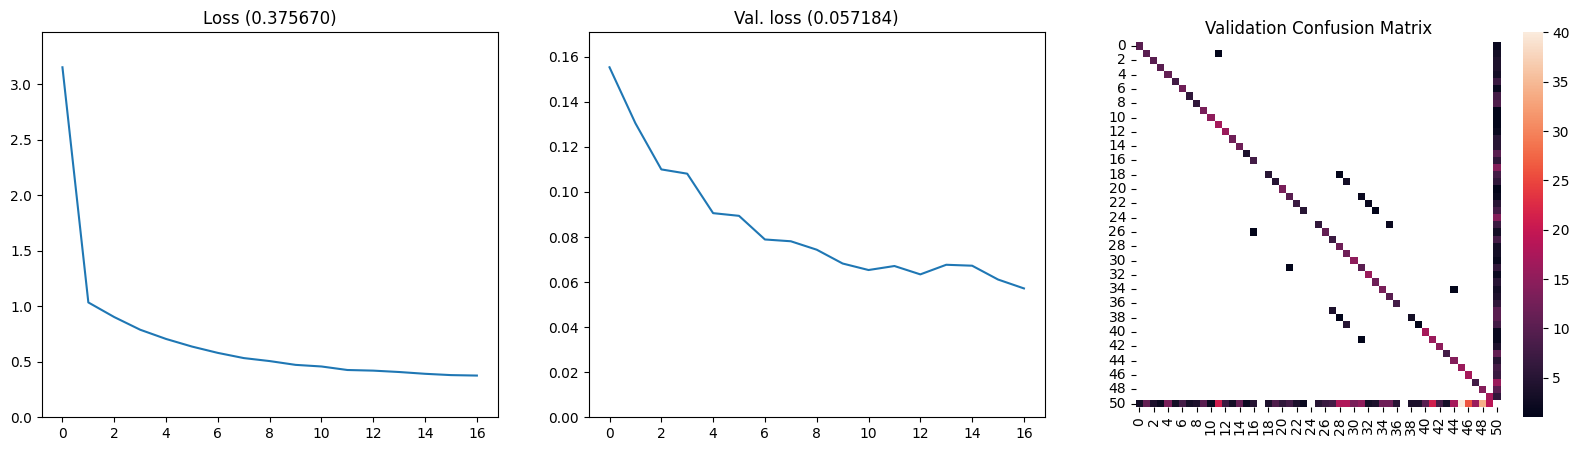

686/686 [==============================] - 8s 12ms/step - loss: 0.3757 - val_loss: 0.0572
Epoch 18/40
686/686 [==============================] - ETA: 0s - loss: 0.3693

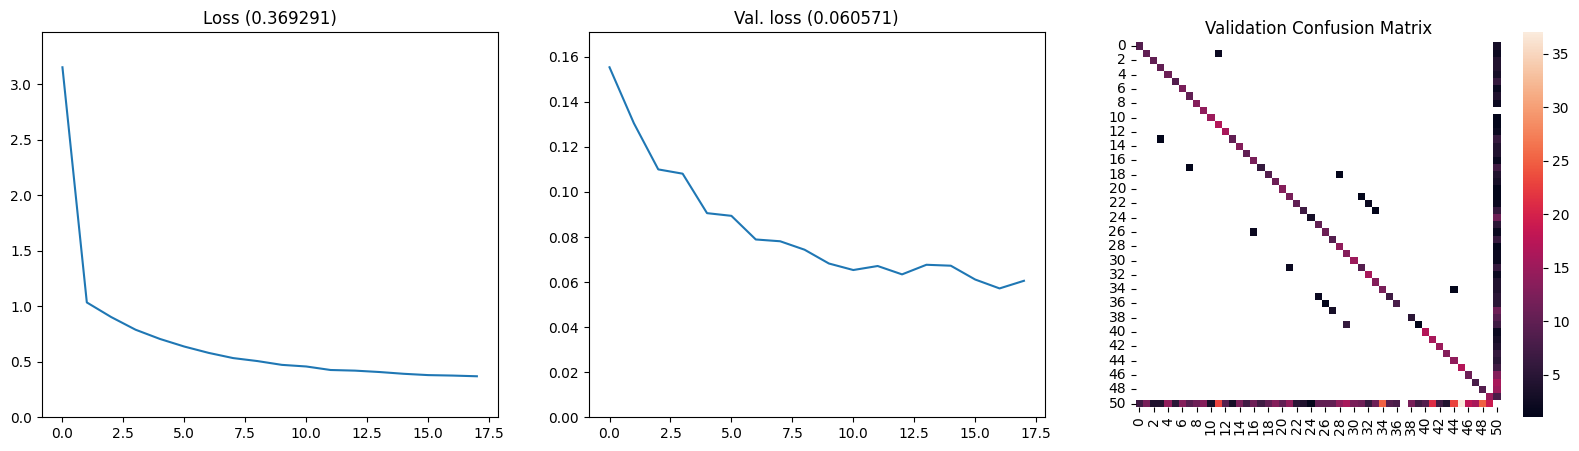

686/686 [==============================] - 8s 11ms/step - loss: 0.3693 - val_loss: 0.0606
Epoch 19/40
681/686 [============================>.] - ETA: 0s - loss: 0.3594

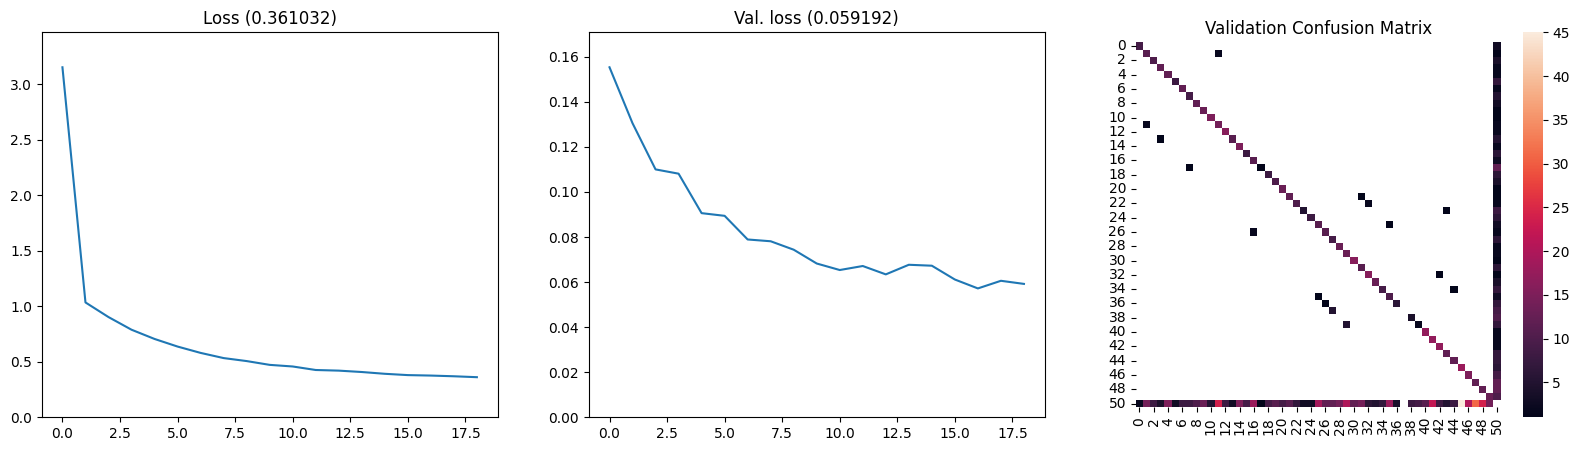

686/686 [==============================] - 8s 11ms/step - loss: 0.3610 - val_loss: 0.0592
Epoch 20/40
686/686 [==============================] - ETA: 0s - loss: 0.3473

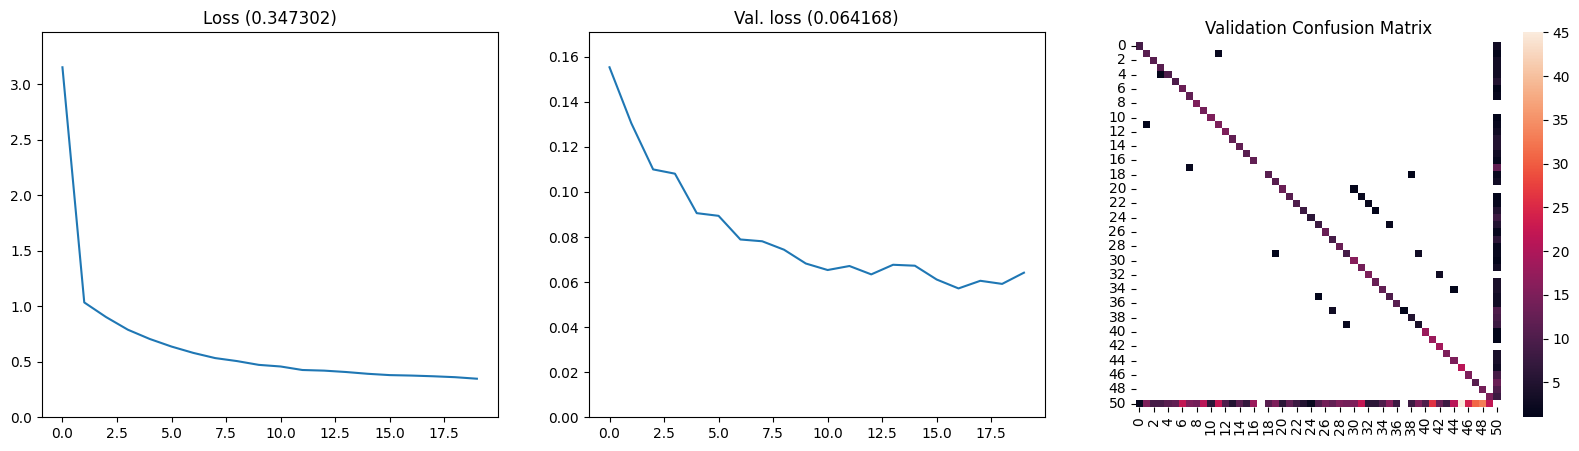

686/686 [==============================] - 8s 11ms/step - loss: 0.3473 - val_loss: 0.0642
Epoch 21/40
686/686 [==============================] - ETA: 0s - loss: 0.3515

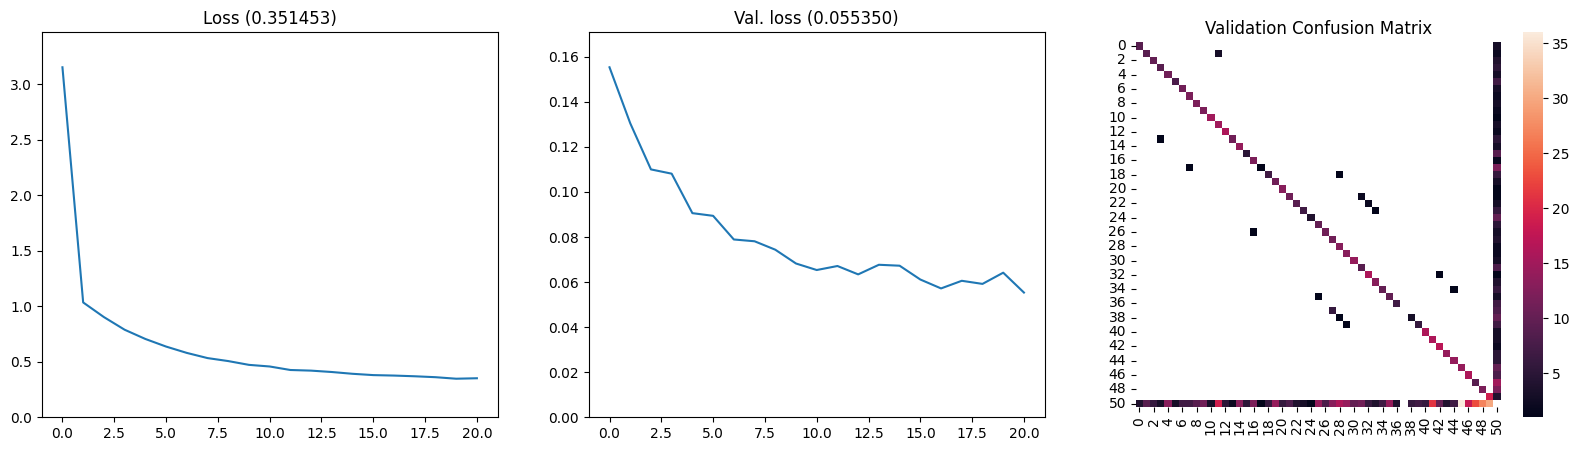

686/686 [==============================] - 8s 11ms/step - loss: 0.3515 - val_loss: 0.0554
Epoch 22/40
682/686 [============================>.] - ETA: 0s - loss: 0.3310

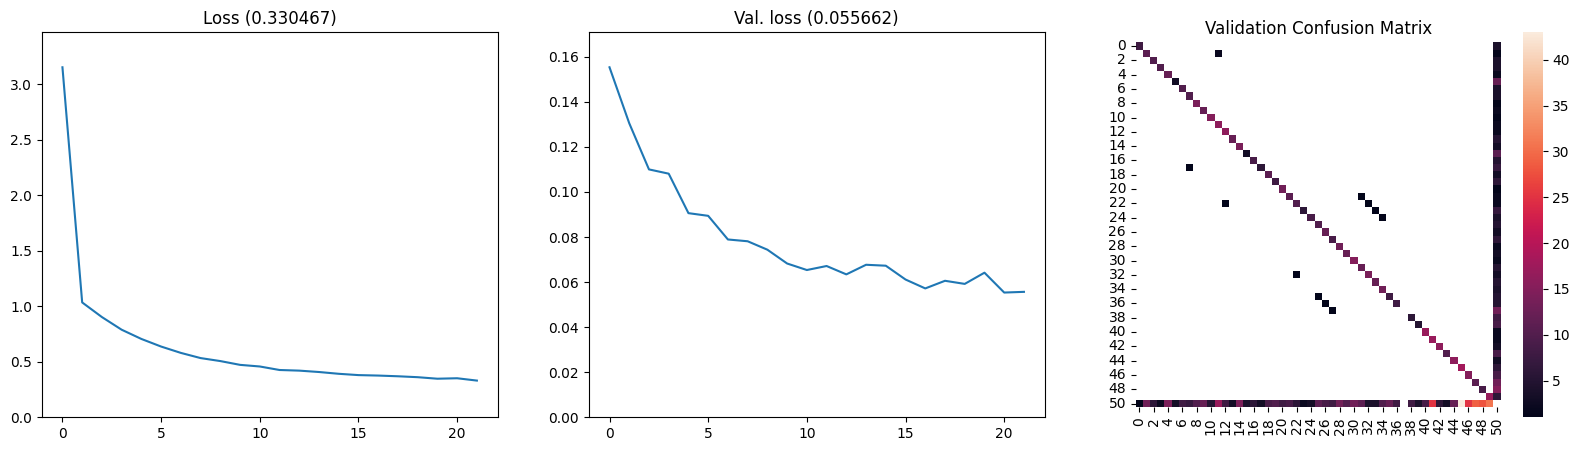

686/686 [==============================] - 9s 13ms/step - loss: 0.3305 - val_loss: 0.0557
Epoch 23/40
685/686 [============================>.] - ETA: 0s - loss: 0.3299

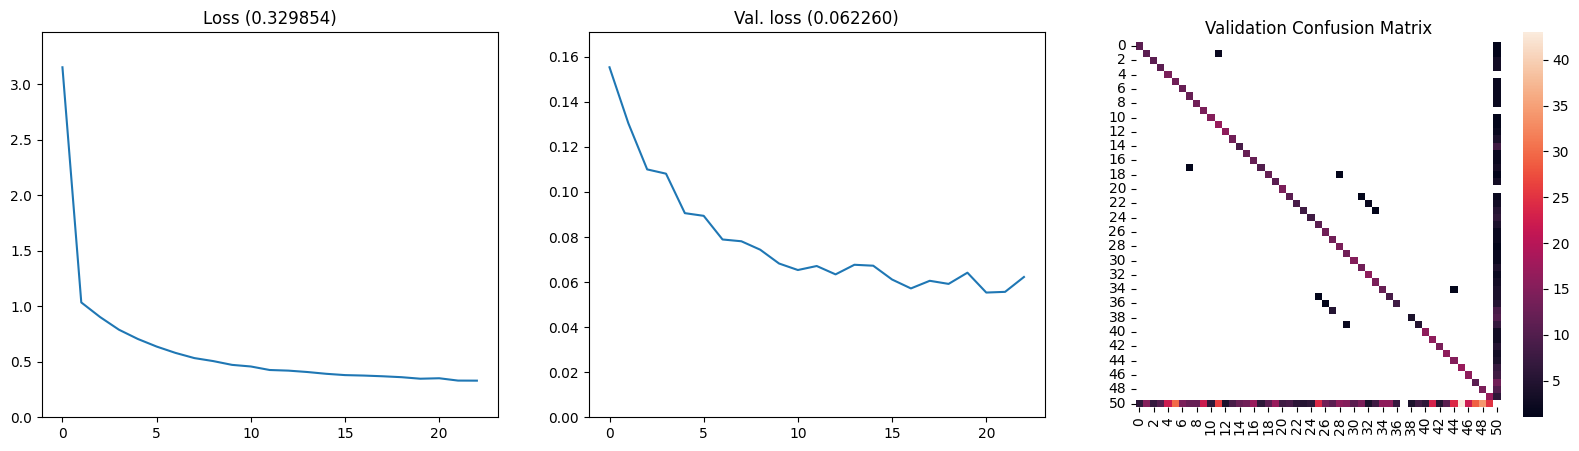

686/686 [==============================] - 13s 20ms/step - loss: 0.3299 - val_loss: 0.0623
Epoch 24/40
686/686 [==============================] - ETA: 0s - loss: 0.3304

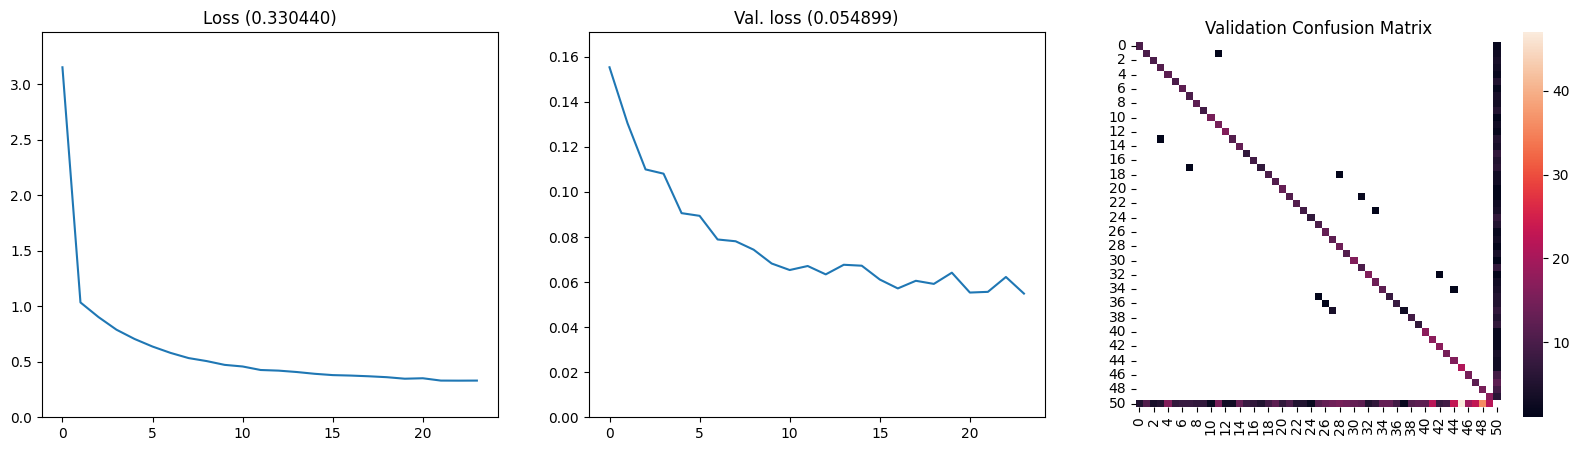

686/686 [==============================] - 8s 12ms/step - loss: 0.3304 - val_loss: 0.0549
Epoch 25/40
683/686 [============================>.] - ETA: 0s - loss: 0.3174

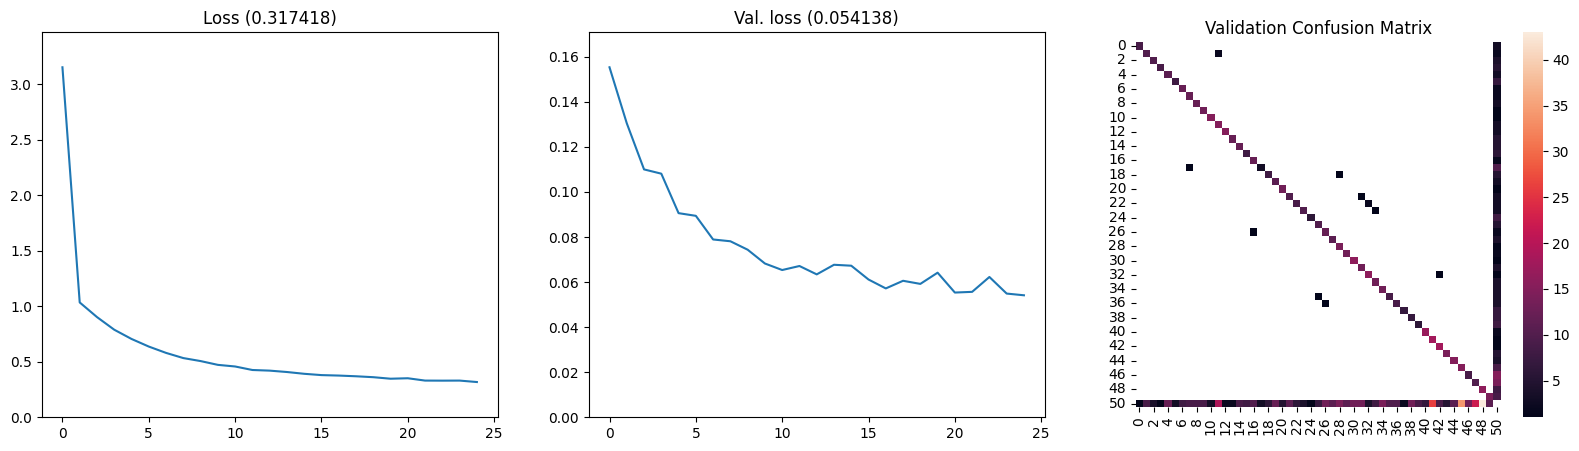

686/686 [==============================] - 8s 12ms/step - loss: 0.3174 - val_loss: 0.0541
Epoch 26/40
683/686 [============================>.] - ETA: 0s - loss: 0.3175

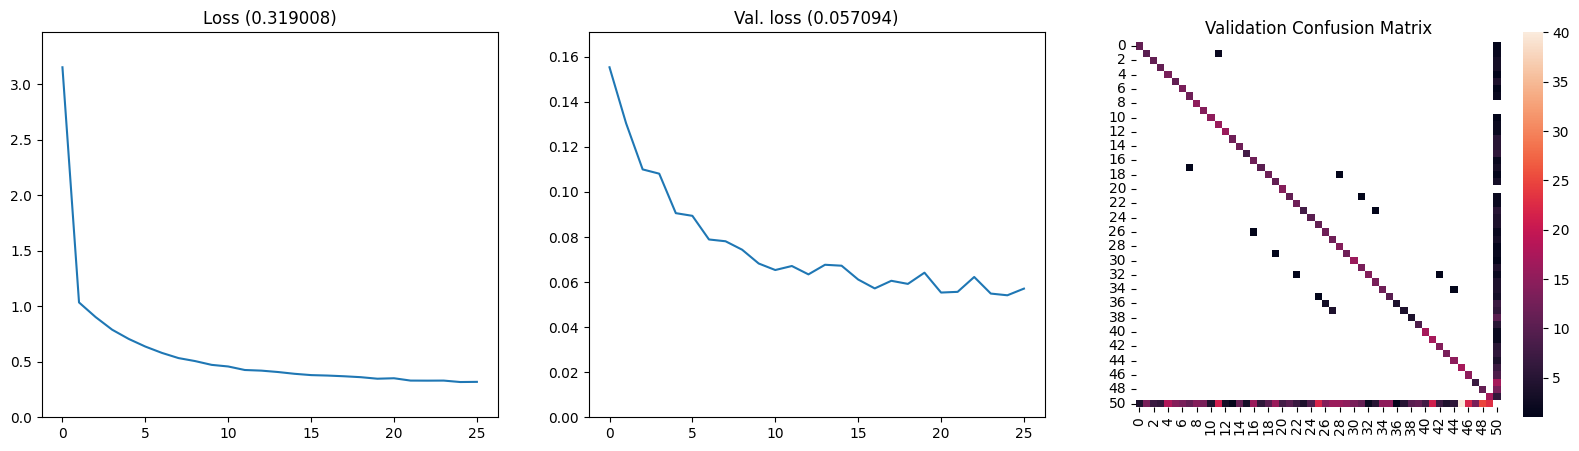

686/686 [==============================] - 8s 12ms/step - loss: 0.3190 - val_loss: 0.0571
Epoch 27/40
686/686 [==============================] - ETA: 0s - loss: 0.3072

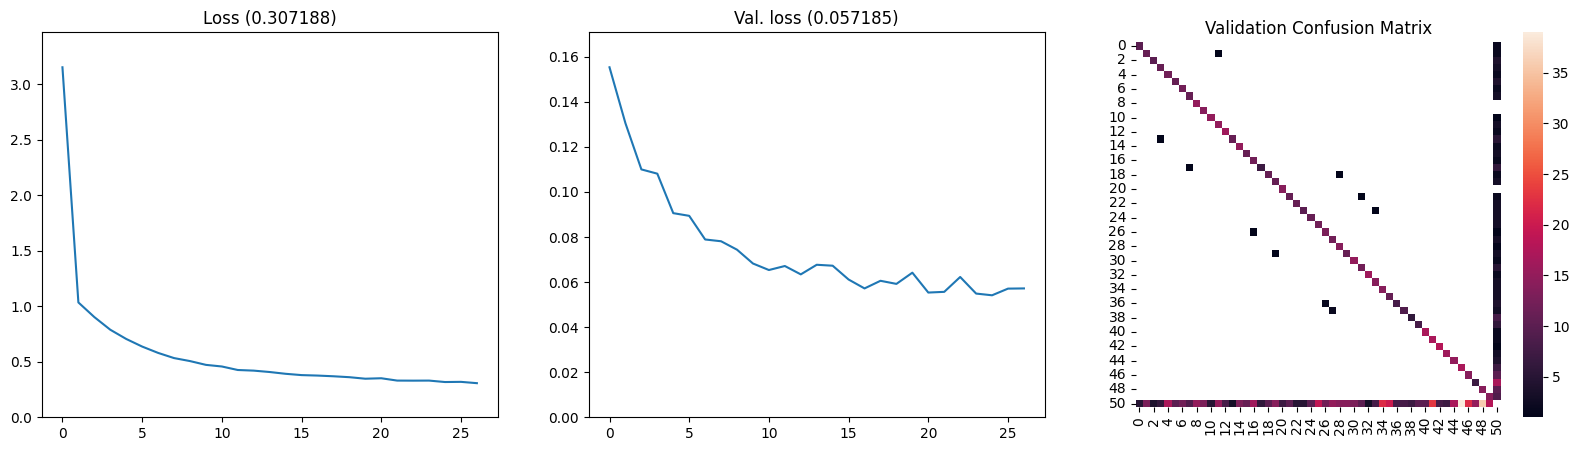

686/686 [==============================] - 10s 14ms/step - loss: 0.3072 - val_loss: 0.0572
Epoch 28/40
684/686 [============================>.] - ETA: 0s - loss: 0.3103

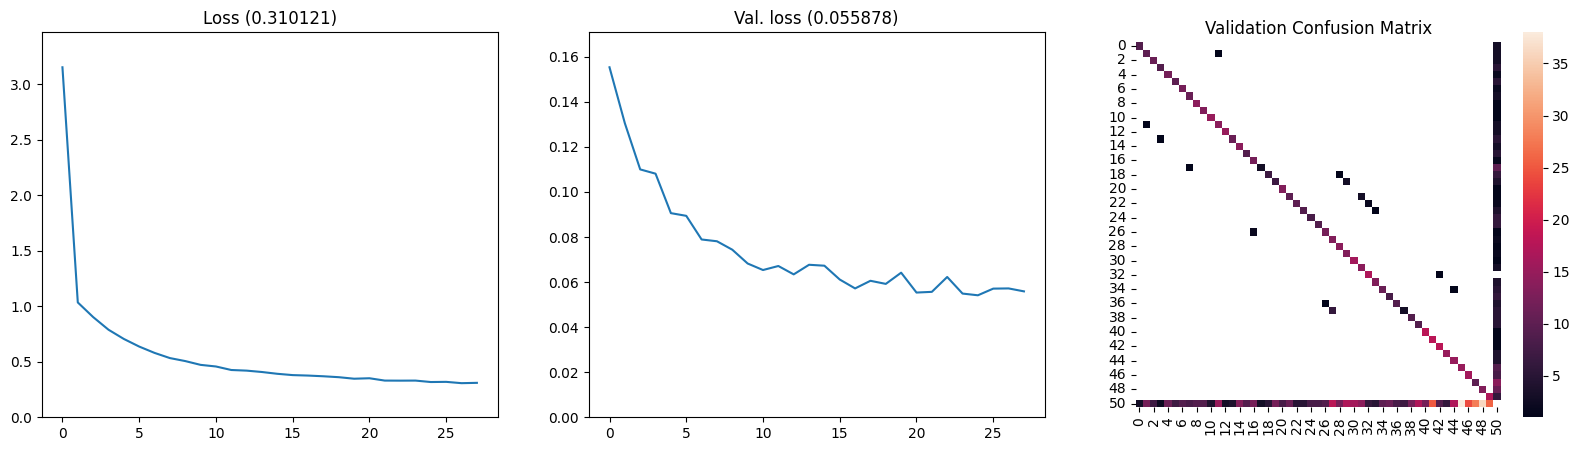

686/686 [==============================] - 9s 12ms/step - loss: 0.3101 - val_loss: 0.0559
Epoch 29/40
683/686 [============================>.] - ETA: 0s - loss: 0.2999

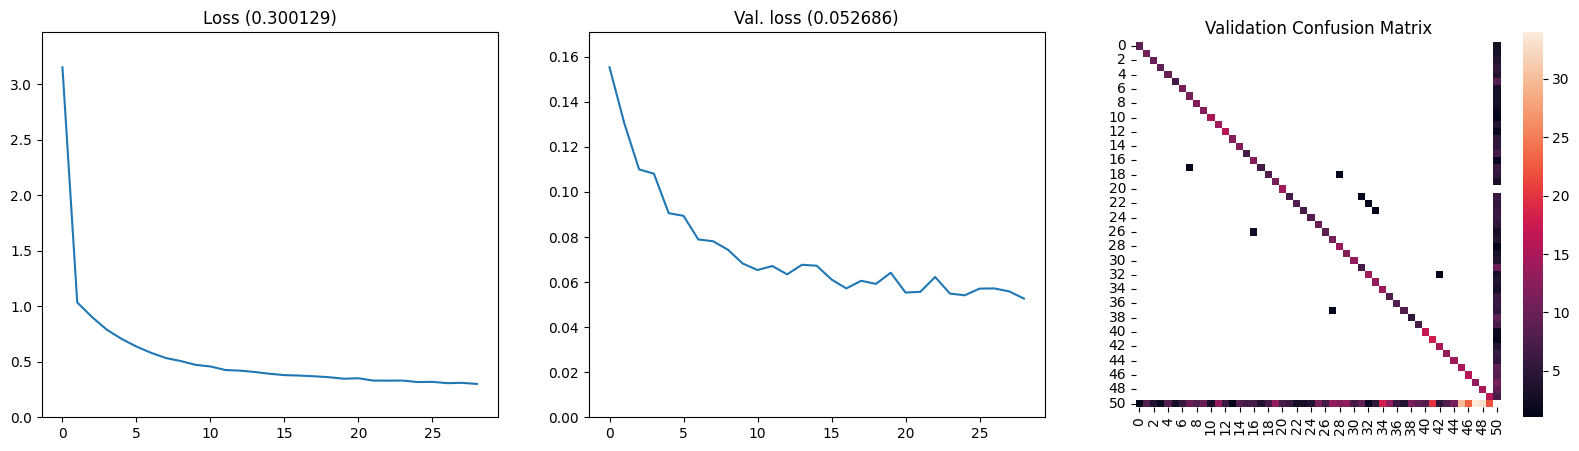

686/686 [==============================] - 7s 11ms/step - loss: 0.3001 - val_loss: 0.0527
Epoch 30/40
685/686 [============================>.] - ETA: 0s - loss: 0.3042

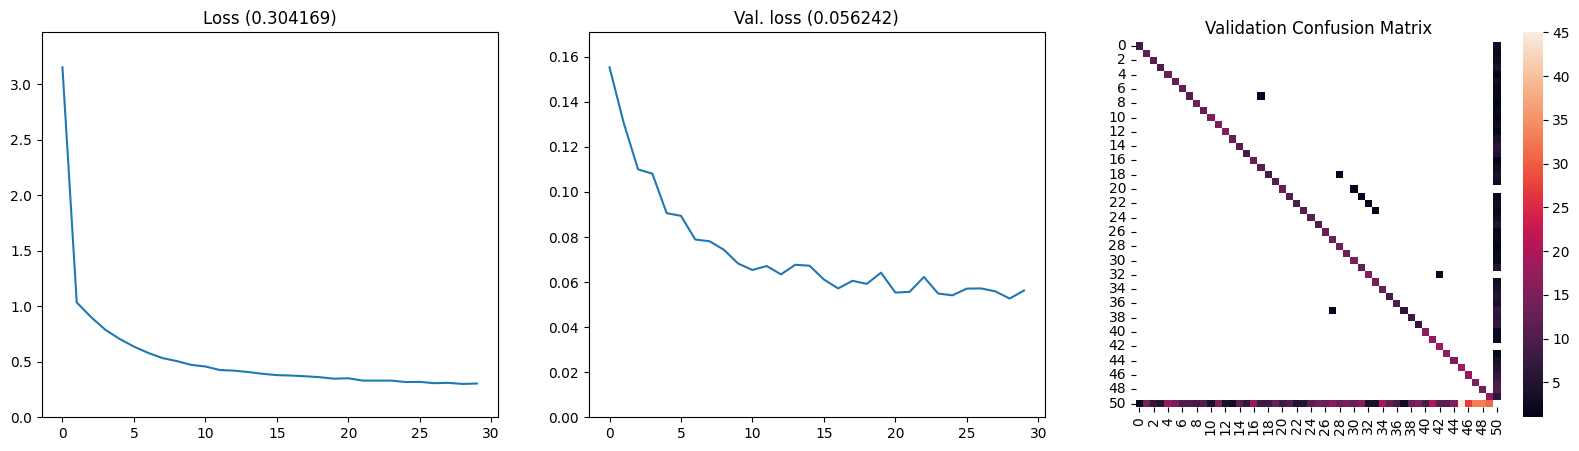

686/686 [==============================] - 8s 11ms/step - loss: 0.3042 - val_loss: 0.0562
Epoch 31/40
686/686 [==============================] - ETA: 0s - loss: 0.2925

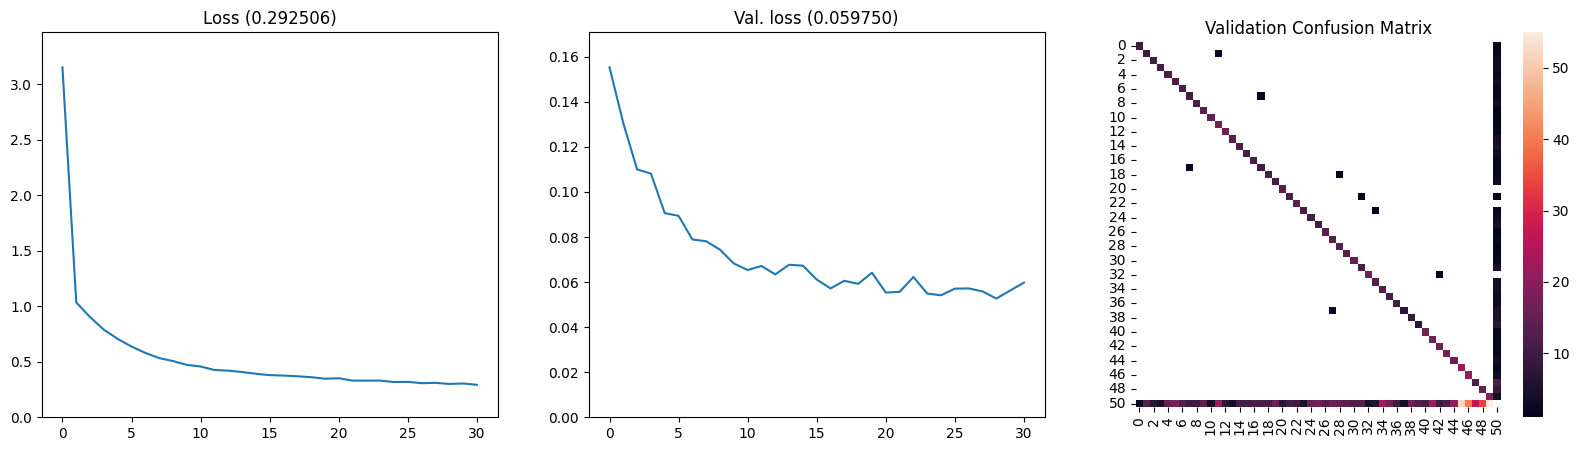

686/686 [==============================] - 8s 11ms/step - loss: 0.2925 - val_loss: 0.0597
Epoch 32/40
683/686 [============================>.] - ETA: 0s - loss: 0.2911

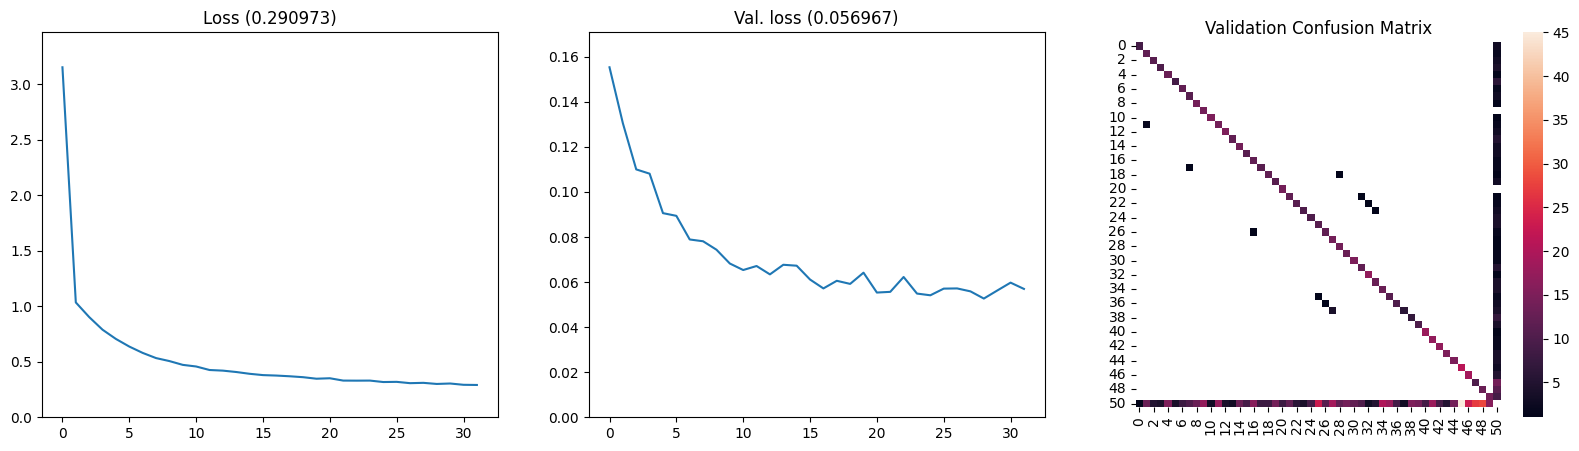

686/686 [==============================] - 8s 12ms/step - loss: 0.2910 - val_loss: 0.0570
Epoch 33/40
685/686 [============================>.] - ETA: 0s - loss: 0.2784

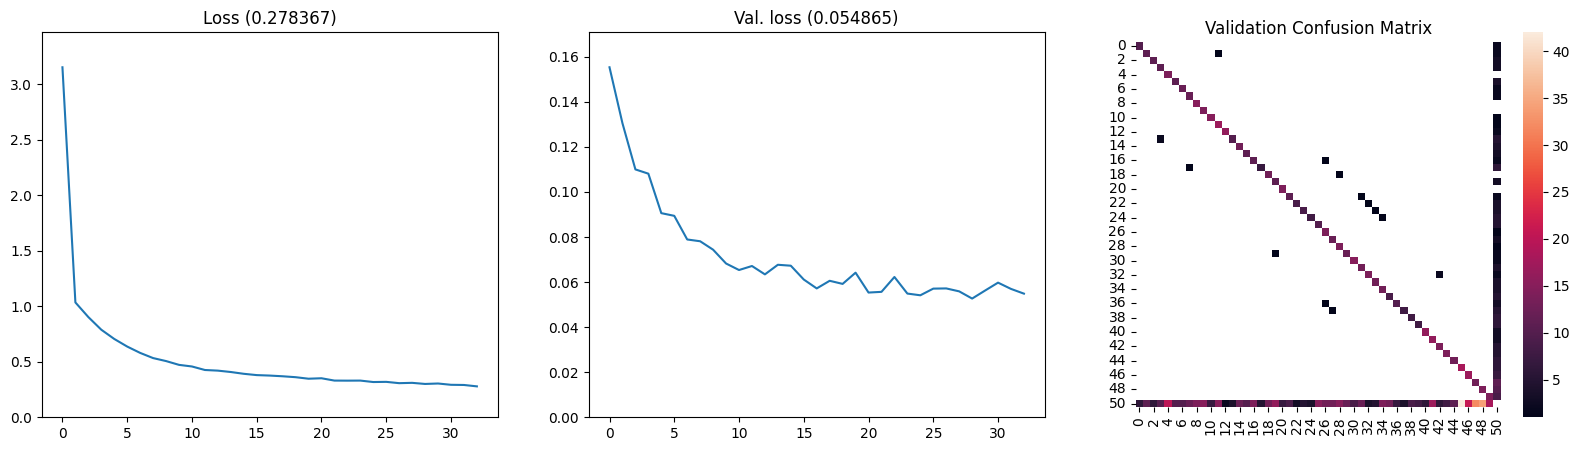

686/686 [==============================] - 7s 10ms/step - loss: 0.2784 - val_loss: 0.0549
Epoch 34/40
682/686 [============================>.] - ETA: 0s - loss: 0.2877

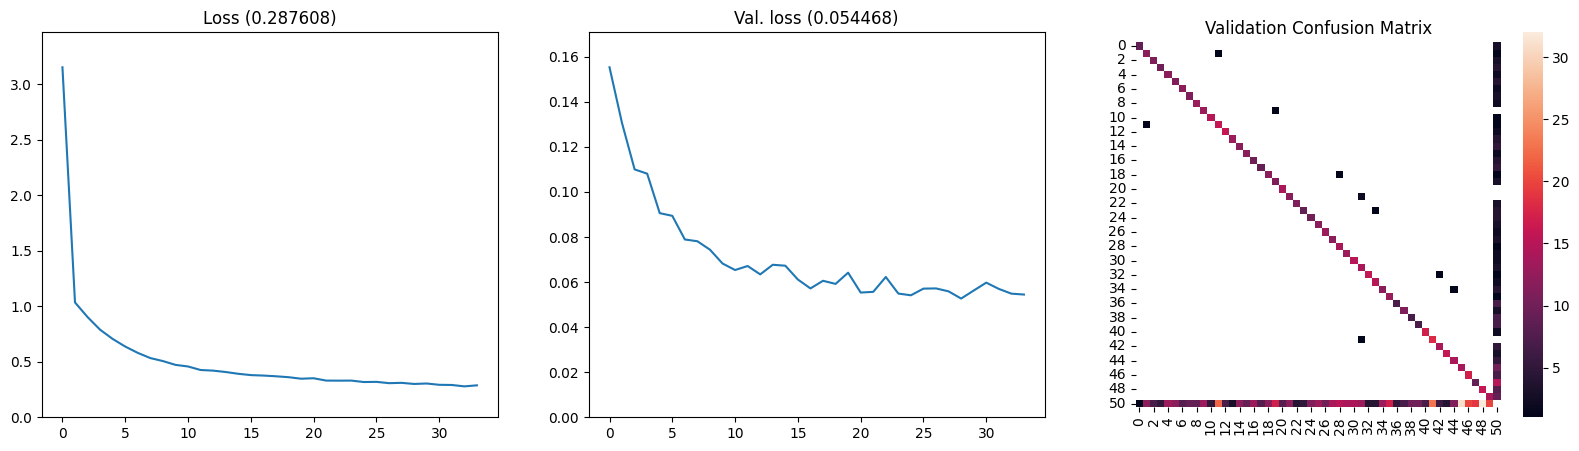

686/686 [==============================] - 7s 11ms/step - loss: 0.2876 - val_loss: 0.0545
Epoch 35/40
681/686 [============================>.] - ETA: 0s - loss: 0.2808

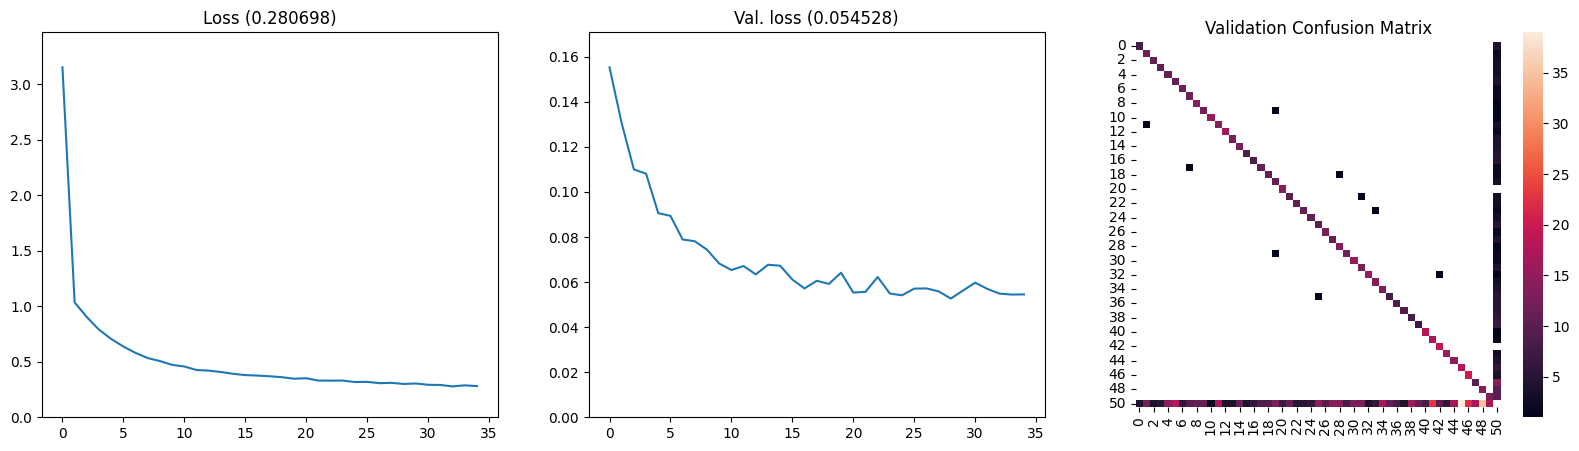

686/686 [==============================] - 8s 11ms/step - loss: 0.2807 - val_loss: 0.0545
Epoch 36/40
686/686 [==============================] - ETA: 0s - loss: 0.2731

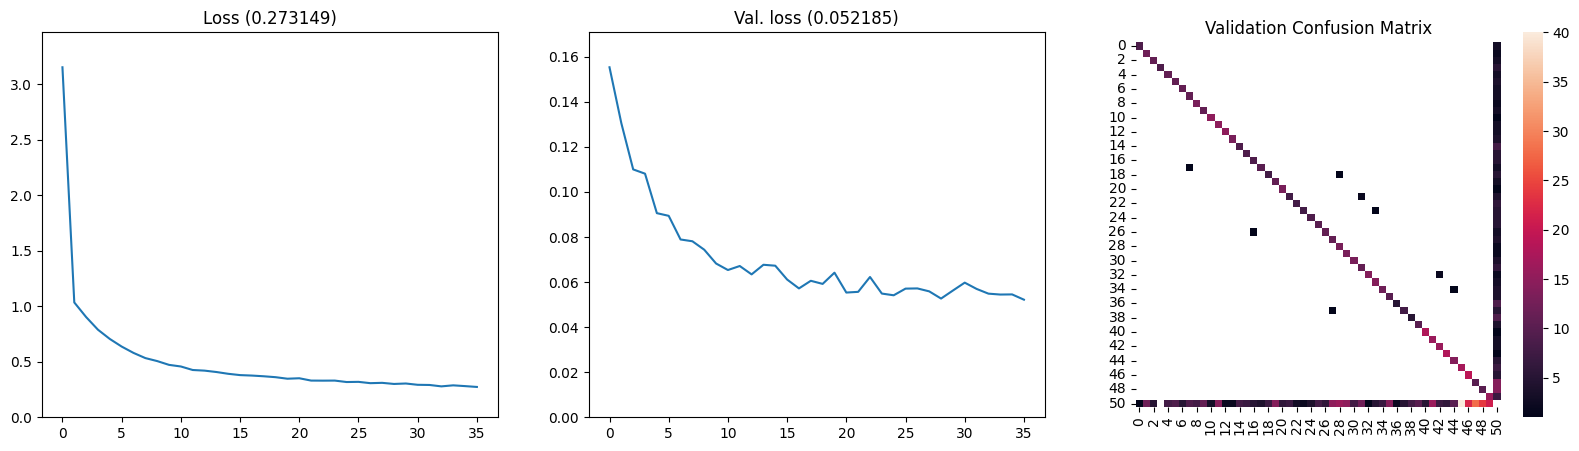

686/686 [==============================] - 8s 11ms/step - loss: 0.2731 - val_loss: 0.0522
Epoch 37/40
682/686 [============================>.] - ETA: 0s - loss: 0.2748

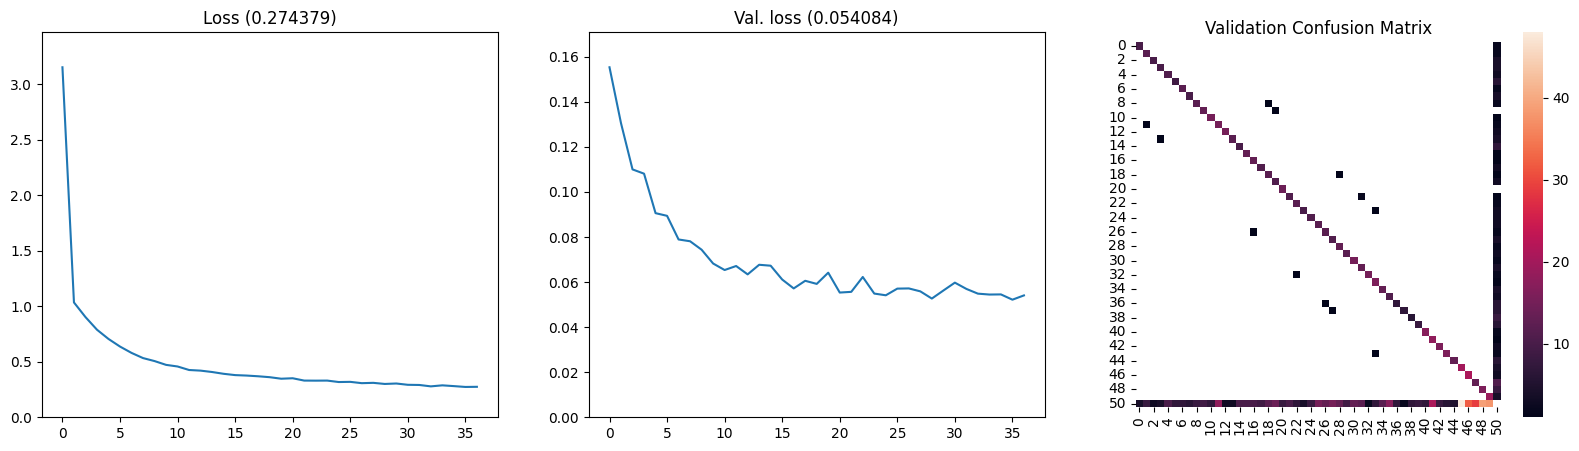

686/686 [==============================] - 8s 11ms/step - loss: 0.2744 - val_loss: 0.0541
Epoch 38/40
681/686 [============================>.] - ETA: 0s - loss: 0.2623

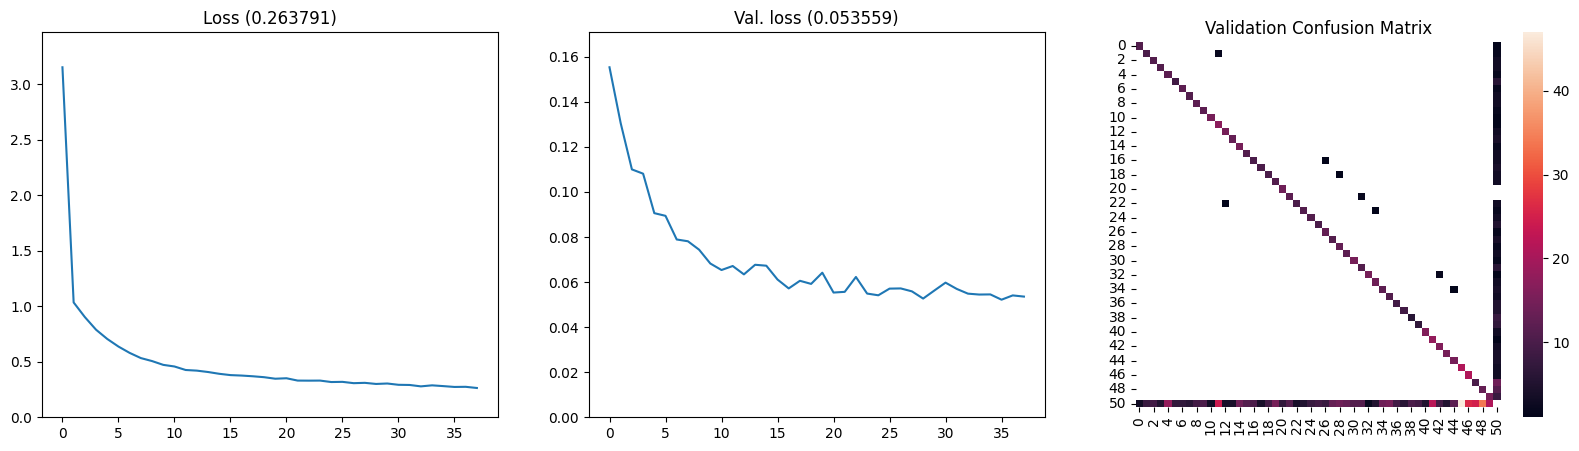

686/686 [==============================] - 8s 11ms/step - loss: 0.2638 - val_loss: 0.0536
Epoch 39/40
686/686 [==============================] - ETA: 0s - loss: 0.2673

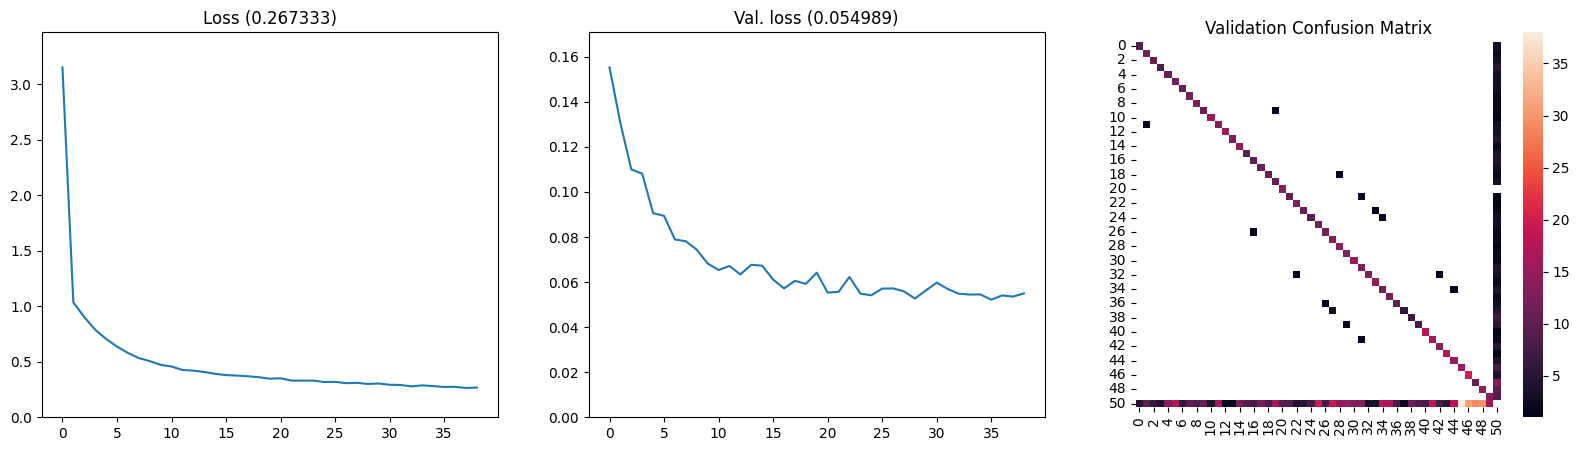

686/686 [==============================] - 8s 12ms/step - loss: 0.2673 - val_loss: 0.0550
Epoch 40/40
686/686 [==============================] - ETA: 0s - loss: 0.2618

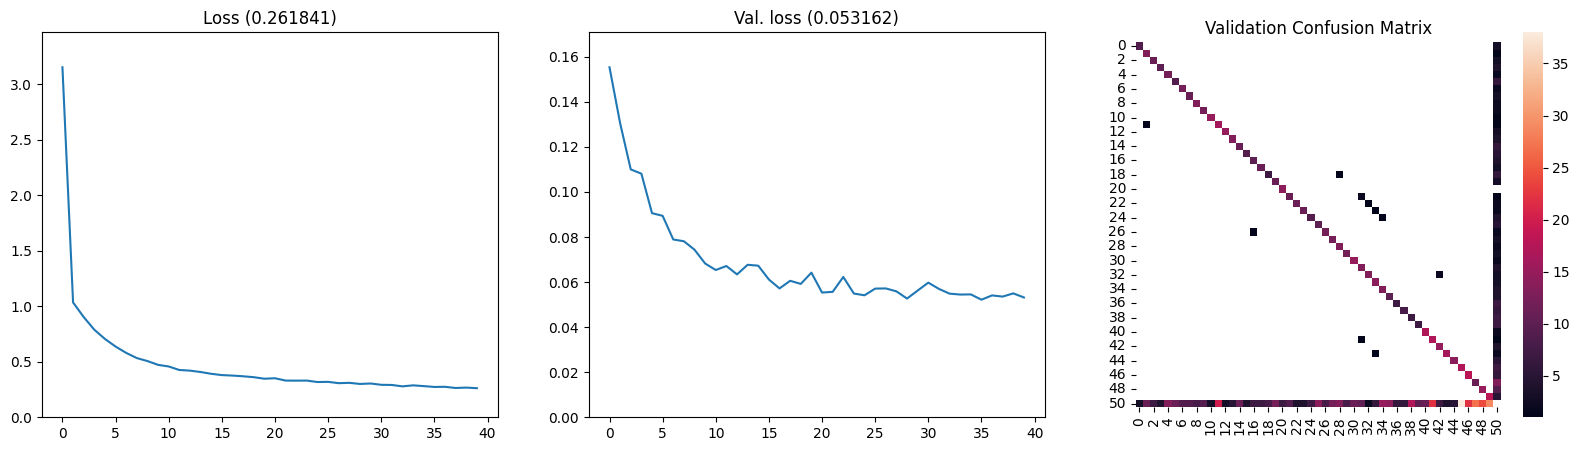

686/686 [==============================] - 8s 11ms/step - loss: 0.2618 - val_loss: 0.0532


In [137]:
preprocessing_config = {
    'seed': 42, 
    'n_timesteps': 20, 
    'delay': 0, 
    'max_obs_per_class': None, 
    'gesture_allowlist': list(range(51)), 
    'num_gesture_classes': None, 
    'rep_num': 0
}

clf = models.FFNNClassifier(
    config={
        "preprocessing": preprocessing_config,
        "n_timesteps": 20,
        "nn": {
            "epochs": 40,
            "batch_size": 215,
            "learning_rate": 0.00023589289006203078,
            "optimizer": "adam",
        },
        "ffnn": {
            "nodes_per_layer": [166, 7],
            "l2_coefficient": 9.882087678708446e-07,
            "dropout_rate": 0.08592214067336573,
        },
    }
)

clf.fit(
    X_trn,
    y_trn,
    dt_trn,
    validation_data=(X_val, y_val, dt_val),
    verbose=True,
    callbacks=[
        models.DisplayConfMat(
            validation_data=(X_val, y_val, dt_val),
            conf_mat=False,
            fig_path=None,
        ),
#         keras.callbacks.ReduceLROnPlateau(
#             monitor="val_loss", 
#             factor=0.5, 
#             patience=5
#         ),
    ],
)


In [139]:
def get_clf_report(fn, X_val, y_val):
    report = sklearn.metrics.classification_report(
        fn(X_val).astype(int),
        y_val.astype(int),
        output_dict=True,
        zero_division=0,
    )
    return pd.json_normalize(report).iloc[0]

score = get_clf_report(clf.predict, X_val, y_val)['macro avg.f1-score']
path = f'../saved_models/ffnn_f1={score:.6f}'
clf.dump(path)
print(score, path)

Dump[../saved_models/ffnn_f1=0.641623]: Creating directory
Dump[../saved_models/ffnn_f1=0.641623]: Saving model
Dump[../saved_models/ffnn_f1=0.641623]: Saving training data
Dump[../saved_models/ffnn_f1=0.641623]: Saving validation data
Dump[../saved_models/ffnn_f1=0.641623]: Saving config
Dump[../saved_models/ffnn_f1=0.641623]: Saving i2g and g2i
0.6416232807535062 ../saved_models/ffnn_f1=0.641623


In [30]:
y_val_pred = np.argmax(tf.nn.softmax(clf.model(X_val)).numpy(), axis=1)

pred_50 = np.nonzero((y_val_pred == 50) & (y_val != 50))[0]

@interact(idx=(0, len(pred_50)))
def show_mislabelled(idx=0):
    observation = X_val[pred_50[idx]]
    pred_label = y_val_pred[pred_50[idx]]
    true_label = y_val[pred_50[idx]]
    fig, axs = plt.subplots(3, 1, figsize=(8, 6))
    axs[1].plot(observation)
    axs[1].set_title(f'Predicted {pred_label} but actually {true_label}')
    ex_true = np.nonzero(y_val == true_label)[0]
    ex_pred = np.nonzero(y_val == pred_label)[0]
#     axs[0].plot(X_val[ex_true[0]])
#     axs[0].set_title(f'Exemplar {true_label}')
    axs[2].plot(X_val[ex_pred[0]])
    axs[2].set_title(f'Exemplar true {pred_label}')
    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=0, description='idx', max=1022), Output()), _dom_classes=('widget-intera…